# TELECOM CHURN CASE STUDY

## Business Understanding :

For many incumbent telecom operators, retaining high profitable customers is the number one business goal. The telecommunications industry experiences an average of 15-25% annual churn rate. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Aim :

To identify customers at high risk of churn and identify the main indicators of churn. <br>The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 
We need to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

## Flow of Analysis :

**1. Import the required libraries** <br>
**2. Read and understand the data** <br>
**3. Data cleanup and preparation**<br>
**4. Filter High Value customer**<br>
**5. Churn Analysis**<br>
**6. Exploratory Data Analysis**<br>
**7. Model building**<br>
**8. Model building - hyperparameters tuning**<br>
**9. Best Model**

### Let's get started...

## 1. Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [3]:
# Adjusting the display to fit rows and columns effectively
start_time = time.time()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 2. Read and understand the data

In [4]:
data = pd.read_csv(r'D:\PGD DS IIITB\Advanced Machine Learning\Telecom Churn Case Study\telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
# Checking the number of fields and rows in the dataset

data.shape

(99999, 226)

In [6]:
# Checking for duplicates and deleteing the duplicate records. 

data.drop_duplicates()
data.shape

(99999, 226)

In [7]:
# Checking the fields and their datatypes

data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [8]:
# Check statistical information abut numerical fields.

data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [9]:
# Segregate Categorcial, ID and Numeric columns for ease of analysis

#Categorcial columns separation : categorical columns are only date here
date_columns = [col for col in data.columns if data[col].dtype =="object"]    
print(f"Total Categorical columns:{len(date_columns)}")

#ID columns separation
id_columns = ["mobile_number","circle_id"]  # total ID columns are 2 
print(f"Total numeric columns:{len(id_columns)}")

#Numeric columns separation
numeric_columns = [ col for col in data.columns if col not in date_columns + id_columns]    
print(f"Total numeric columns:{len(numeric_columns)}")

Total Categorical columns:12
Total numeric columns:2
Total numeric columns:212


## 3. Data Cleanup and Preparation

### 3.1 Renaming fields

In [10]:
# Few fields have month name in it, instead of month number.

data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

### 3.2 Strip Leading and trailing whitespaces

In [11]:
#Get the string columns in the data frame
str_cols = data.select_dtypes(['object'])
#Strip the leading and trailing whitespaces
data[str_cols.columns] = str_cols.apply(lambda x: x.str.strip())

### 3.3 Convert all the string columns to upper case

In [12]:
data[str_cols.columns] = str_cols.apply(lambda x: x.str.upper())

### 3.4 Convert the date columns from string to date type

In [13]:
dateColumns = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
data[dateColumns]=data[dateColumns].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y', errors='coerce'))
data[dateColumns]

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-30,2014-07-31,2014-08-31,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08
1,2014-06-30,2014-07-31,2014-08-31,2014-06-29,2014-07-31,2014-08-28,NaT,2014-07-25,2014-08-10
2,2014-06-30,2014-07-31,2014-08-31,2014-06-17,2014-07-24,2014-08-14,NaT,NaT,NaT
3,2014-06-30,2014-07-31,2014-08-31,2014-06-28,2014-07-31,2014-08-31,NaT,NaT,NaT
4,2014-06-30,2014-07-31,2014-08-31,2014-06-26,2014-07-28,2014-08-09,2014-06-04,NaT,NaT
...,...,...,...,...,...,...,...,...,...
99994,2014-06-30,2014-07-31,2014-08-31,2014-06-03,2014-07-20,2014-08-26,NaT,NaT,NaT
99995,2014-06-30,2014-07-31,2014-08-31,2014-06-17,2014-07-17,2014-08-24,NaT,NaT,NaT
99996,2014-06-30,2014-07-31,2014-08-31,2014-06-13,2014-07-26,NaT,2014-06-13,NaT,NaT
99997,2014-06-30,2014-07-31,2014-08-31,2014-06-17,2014-07-19,2014-08-20,2014-06-17,2014-07-19,2014-08-20


### 3.5 Missing Value Analysis

In [14]:
# Checking the % of null or missing values in each column
round(data.isnull().mean() * 100,2).sort_values(ascending = False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

1. Many false null value columns are available. if customer did not recharge, the value assigned as NaN
2. Hence we can not drop these values blindly.
3. We can impute these columns as zero.
4. When customer did not recharge,the total_rechdata and date_of_last_rechdata are null

- Total Recharge data in month 6,7,8,9 would be null
- Maximum Recharge Data in Month 6,7,8 ,9 would be null
- Average Amount recharge Data in Month 6,7,8,9, would be null
- Hence this NULL can not be dropped out.
We will impute with Zero.

In [15]:
# when total_rech_data and date_of_last_rech_data is null, Check date_of_last_rech_data,total_rech_data,max_rech_data etc. 
data[data["total_rech_data_6"].isna() & data["date_of_last_rech_data_6"].isna()][ \
    ["date_of_last_rech_data_6","total_rech_data_6","max_rech_data_6","max_rech_data_6","av_rech_amt_data_6"]]

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,max_rech_data_6,av_rech_amt_data_6
1,NaT,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN
5,NaT,NaN,NaN,NaN,NaN
6,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...
99991,NaT,NaN,NaN,NaN,NaN
99992,NaT,NaN,NaN,NaN,NaN
99993,NaT,NaN,NaN,NaN,NaN
99994,NaT,NaN,NaN,NaN,NaN


In [16]:
# Columns which we have to impute as Zero.
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]
# Put zero in these columns
data[zero_impute] = data[zero_impute].apply(lambda x: x.fillna(0))

Below columns are imputed with zeros.

- Total Recharge data in month 6,7,8,9
- Maximum Recharge Data in Month 6,7,8,9
- Average Amount recharge Data in Month 6,7,8,9

In [17]:
# We will drop date columns and ID columns as these will not contribute further to our analysis.

data.drop(columns=id_columns,inplace=True)
data.drop(columns=date_columns,inplace=True)

In [18]:
# Check the columns associated with month 6 . From this, we can get an overview of columns/features in 7,8,9 months
month_6_cols = [col for col in data.columns if "_6" in col]
print(len(month_6_cols))
month_6_cols

52


['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'vbc_3g_6']

In [19]:
# check how the data looks for month 6
data[month_6_cols].head(10)

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2c_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_t2o_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,last_day_rch_amt_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6,vbc_3g_6
0,197.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,4,362,252,252,1.0,252.0,0.0,1.0,252.0,30.13,83.57,212.17,212.17,0.0,0,0,1,0,1.0,101.20
1,34.047,24.11,15.74,0.00,0.00,23.88,11.51,0.00,0.00,35.39,0.23,0.00,0.00,0.0,0.23,0.0,4.68,0.00,40.31,1.61,17.48,0.00,19.09,0.00,5.90,0.00,0.0,5.90,26.83,0.00,1.83,0.00,4,74,44,44,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
2,167.690,11.54,143.33,0.00,0.00,7.19,29.34,24.11,0.00,60.66,4.34,41.81,1.48,0.0,47.64,0.0,46.56,0.45,155.33,115.69,14.38,99.48,229.56,72.41,45.18,21.73,0.0,139.33,370.04,0.21,0.00,0.93,5,168,86,0,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,4.17
3,221.338,99.91,123.31,0.00,0.00,73.68,107.43,1.91,0.00,183.03,26.23,2.99,0.00,0.0,29.23,0.0,10.96,0.00,223.23,62.08,113.96,57.43,233.48,43.48,1.33,1.18,0.0,45.99,280.08,0.59,0.00,0.00,10,230,60,30,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
4,261.636,50.31,76.96,0.00,0.00,50.31,67.64,0.00,0.00,117.96,0.00,9.31,0.00,0.0,9.31,0.0,0.00,0.00,127.28,105.68,106.84,1.50,214.03,0.00,1.93,0.00,0.0,1.93,216.44,0.00,0.00,0.48,5,196,56,50,1.0,56.0,1.0,0.0,56.0,0.00,0.00,0.00,0.00,0.0,0,1,0,0,0.0,0.00
5,50.258,50.16,19.28,0.00,0.00,50.16,16.39,0.00,0.00,66.56,0.00,0.00,2.88,0.0,2.88,0.0,0.00,0.00,69.44,28.73,49.19,0.00,77.93,0.00,0.00,77.03,0.0,77.03,155.39,0.43,0.00,0.00,2,120,120,120,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
6,429.023,71.03,262.73,0.00,0.00,71.03,252.23,10.38,0.11,333.64,0.00,0.00,0.00,0.0,0.00,0.0,0.11,0.00,333.76,1857.99,248.64,20.24,2126.89,0.00,1.39,0.00,0.0,1.39,2128.41,0.00,0.00,0.11,15,499,90,37,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
7,1069.180,57.84,453.43,16.23,23.74,51.39,308.63,62.13,0.00,422.16,4.30,49.89,6.66,0.0,60.86,0.0,4.50,0.00,487.53,58.14,217.56,152.16,427.88,36.89,91.44,52.19,0.0,180.54,626.46,0.21,2.06,15.74,5,1580,1580,0,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,18.74
8,378.721,413.69,94.66,0.00,0.00,297.13,80.96,0.00,0.00,378.09,116.56,13.69,0.00,0.0,130.26,0.0,0.00,0.00,508.36,23.84,57.58,0.00,81.43,0.00,22.43,0.00,0.0,22.43,103.86,0.00,0.00,0.00,19,437,90,50,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,122.16
9,119.518,33.89,63.48,0.00,0.00,33.89,38.03,0.00,0.00,71.93,0.00,25.45,0.00,0.0,25.45,0.0,0.66,0.00,98.04,129.34,132.94,0.40,262.69,0.30,32.86,0.00,0.0,33.16,303.98,0.00,8.11,0.00,4,220,110,110,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00


In [20]:
# Check again the null values percentages
(data.isnull().sum()/len(data)).sort_values(ascending = False)

count_rech_2g_6       0.748467
arpu_3g_6             0.748467
count_rech_3g_6       0.748467
night_pck_user_6      0.748467
fb_user_6             0.748467
arpu_2g_6             0.748467
night_pck_user_7      0.744287
count_rech_3g_7       0.744287
fb_user_7             0.744287
arpu_2g_7             0.744287
count_rech_2g_7       0.744287
arpu_3g_7             0.744287
arpu_2g_9             0.740777
arpu_3g_9             0.740777
count_rech_3g_9       0.740777
night_pck_user_9      0.740777
count_rech_2g_9       0.740777
fb_user_9             0.740777
arpu_3g_8             0.736607
count_rech_2g_8       0.736607
arpu_2g_8             0.736607
fb_user_8             0.736607
count_rech_3g_8       0.736607
night_pck_user_8      0.736607
loc_og_t2c_mou_9      0.077451
std_og_t2m_mou_9      0.077451
loc_og_mou_9          0.077451
loc_og_t2f_mou_9      0.077451
og_others_9           0.077451
isd_og_mou_9          0.077451
loc_ic_t2t_mou_9      0.077451
loc_ic_t2m_mou_9      0.077451
loc_ic_t

Below Night pack user columns and FB User columns are categorical column.
- "night_pck_user_6"
- "night_pck_user_7"
- "night_pck_user_8"
- "night_pck_user_9"
- "fb_user_6"
- "fb_user_7"
- "fb_user_8"
- "fb_user_9"

In [21]:
# Check night_pck_user unique values in month 6
data["night_pck_user_6"].unique()

array([ 0., nan,  1.])

In [22]:
#Check the percetages null values of these columns
categorical_columns = ["night_pck_user_6","night_pck_user_7","night_pck_user_8","night_pck_user_9","fb_user_6",          
"fb_user_7",          
"fb_user_8",           
"fb_user_9"]

data[categorical_columns].isna().sum()/len(data)

night_pck_user_6    0.748467
night_pck_user_7    0.744287
night_pck_user_8    0.736607
night_pck_user_9    0.740777
fb_user_6           0.748467
fb_user_7           0.744287
fb_user_8           0.736607
fb_user_9           0.740777
dtype: float64

**In the above columns,We can impute the NaN as -1, as a part to mark as missing value.**

In [23]:
#Fill NaN value as -1 to mark missing value
data[categorical_columns] = data[categorical_columns].fillna(-1)

In [24]:
# Check if the null value is filled with -1
data[categorical_columns].isna().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

**Hence there are no null values in night_pck_user and fb_user columns in month 6,7,8,9.**

In [25]:
#Check the null value pecentage
(data.isna().sum()/len(data)).sort_values(ascending=False)

arpu_2g_6             0.748467
count_rech_2g_6       0.748467
arpu_3g_6             0.748467
count_rech_3g_6       0.748467
arpu_2g_7             0.744287
count_rech_2g_7       0.744287
arpu_3g_7             0.744287
count_rech_3g_7       0.744287
count_rech_3g_9       0.740777
arpu_3g_9             0.740777
arpu_2g_9             0.740777
count_rech_2g_9       0.740777
count_rech_3g_8       0.736607
count_rech_2g_8       0.736607
arpu_3g_8             0.736607
arpu_2g_8             0.736607
std_og_t2c_mou_9      0.077451
spl_ic_mou_9          0.077451
std_og_mou_9          0.077451
loc_og_t2c_mou_9      0.077451
isd_og_mou_9          0.077451
ic_others_9           0.077451
loc_og_t2f_mou_9      0.077451
isd_ic_mou_9          0.077451
og_others_9           0.077451
std_og_t2t_mou_9      0.077451
loc_og_mou_9          0.077451
std_og_t2f_mou_9      0.077451
loc_og_t2m_mou_9      0.077451
std_ic_t2f_mou_9      0.077451
loc_ic_t2t_mou_9      0.077451
loc_ic_t2m_mou_9      0.077451
onnet_mo

In [26]:
# Defining function to drop fields where percentage of Null values is greater than 50

def columns_tobe_dropped(cols):
    '''cols: list of columns in dataframe
      '''
    for col in cols:
        if (data[col].isna().sum()/len(data)) > .50:   # Check the condition if null values GT .50
            data.drop(columns=[col],inplace=True)

In [27]:
# drop colums 
columns_tobe_dropped(data.columns)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 196 entries, loc_og_t2o_mou to vbc_3g_9
dtypes: float64(163), int64(33)
memory usage: 149.5 MB


**We are now left with 196 fields in the dataset**

In [29]:
# check the null value again
(data.isna().sum()/len(data)).sort_values(ascending = False)

std_og_mou_9          0.077451
ic_others_9           0.077451
std_ic_mou_9          0.077451
spl_og_mou_9          0.077451
loc_og_t2m_mou_9      0.077451
spl_ic_mou_9          0.077451
isd_ic_mou_9          0.077451
loc_og_t2f_mou_9      0.077451
isd_og_mou_9          0.077451
roam_og_mou_9         0.077451
loc_og_t2c_mou_9      0.077451
og_others_9           0.077451
loc_og_mou_9          0.077451
std_og_t2c_mou_9      0.077451
std_og_t2f_mou_9      0.077451
std_og_t2t_mou_9      0.077451
std_ic_t2o_mou_9      0.077451
loc_og_t2t_mou_9      0.077451
std_og_t2m_mou_9      0.077451
std_ic_t2t_mou_9      0.077451
loc_ic_t2f_mou_9      0.077451
std_ic_t2f_mou_9      0.077451
loc_ic_mou_9          0.077451
offnet_mou_9          0.077451
loc_ic_t2m_mou_9      0.077451
std_ic_t2m_mou_9      0.077451
loc_ic_t2t_mou_9      0.077451
roam_ic_mou_9         0.077451
onnet_mou_9           0.077451
std_og_t2c_mou_8      0.053781
loc_ic_t2m_mou_8      0.053781
isd_og_mou_8          0.053781
std_og_m

In [30]:
#check columns which have only 1 value.

# Create a DataFrame of no of unique  values and filter where only one value is available.
zero_variance_columns = pd.DataFrame(data.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(zero_variance_columns[zero_variance_columns['nunique'] == 1])

              feature  nunique
0      loc_og_t2o_mou        1
1      std_og_t2o_mou        1
2      loc_ic_t2o_mou        1
55   std_og_t2c_mou_6        1
56   std_og_t2c_mou_7        1
57   std_og_t2c_mou_8        1
58   std_og_t2c_mou_9        1
107  std_ic_t2o_mou_6        1
108  std_ic_t2o_mou_7        1
109  std_ic_t2o_mou_8        1
110  std_ic_t2o_mou_9        1


**Above fields have 0 variance and hence can be dropped**

In [31]:
# create columns list whihc have zero variance i:e 1 unique value.
columns_tobe_dropped = list(zero_variance_columns[zero_variance_columns['nunique'] == 1]["feature"])
columns_tobe_dropped

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [32]:
# drop columns whish are having 1 unique values
data.drop(columns=columns_tobe_dropped,inplace=True)

In [33]:
#check the shape
data.shape

(99999, 185)

In [34]:
# Check the null values again
(data.isna().sum()/len(data)).sort_values(ascending=False).reset_index()

,index,0
0,ic_others_9,0.077451
1,roam_og_mou_9,0.077451
2,isd_og_mou_9,0.077451
3,loc_og_t2t_mou_9,0.077451
4,std_ic_t2t_mou_9,0.077451
5,std_og_mou_9,0.077451
6,std_ic_t2m_mou_9,0.077451
7,loc_og_t2f_mou_9,0.077451
8,loc_og_t2c_mou_9,0.077451
9,std_ic_t2f_mou_9,0.077451


- Still we have null values in 107 columns.
- Majority of the null values are in Minitue of Usage columns
- As these values are not available, so we are imputing those values as 0.

In [35]:
# Fill hr NaN as zero.
data = data.fillna(0)

In [36]:
data.isna().sum()

arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
loc_og_mou_9          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 185 entries, arpu_6 to vbc_3g_9
dtypes: float64(152), int64(33)
memory usage: 141.1 MB


- Now there is no null values in the data.
- still we have 99999 rows of data.
- No of columns reduced to 185 from 226.

## 4. Filter High Value customer

- We need to predict churn only for the high-value customers.
- Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [38]:
#Calculate Total Amount recharge --> total talktime recharge
data["total_recharge_amnt_6"] = data.total_rech_amt_6
data["total_recharge_amnt_7"] = data.total_rech_amt_7

In [39]:
#Calculate Average amount of recharge of 6th and 7th month
data['average_amnt_6_7'] = (data["total_recharge_amnt_6"] + data["total_recharge_amnt_7"])/2

In [40]:
# Check the 70th percentile of "average_amnt_6_7"
data['average_amnt_6_7'].quantile(.70)

368.5

- 70th percentile of average amount recharge in 6th and 7th month comes as 478.0.
- Now we need to filter the data based on this value.

In [41]:
#filter based on 70th percentile .
data_highvalue = data[data["average_amnt_6_7"]>= data["average_amnt_6_7"].quantile(.70)]

In [42]:
#Delete the derived columns created in above step
data_highvalue.drop(columns=["total_recharge_amnt_6",\
                                "total_recharge_amnt_7","average_amnt_6_7"],inplace=True)

In [43]:
data_highvalue.shape

(30011, 185)

- As expected we have 30011 rows of high value customer data with 185 columns.

In [44]:
# check the data
data_highvalue.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.0,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.0
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0

## 5. Churn Analysis

1. Now we need to tag the churned customers (churn=1, else 0) based on the fourth month as follows:
2. Those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase.
3. Based on these below attributes we need to decide churners
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [45]:
#Calculate total call in mins by adding Incoming and Outgoing calls
data_highvalue['total_calls_9'] = data_highvalue.total_ic_mou_9 + data_highvalue.total_og_mou_9

In [46]:
# Calculate total 2G and 3G consumption of data
data_highvalue["total_data_consumptions"] = data_highvalue.vol_2g_mb_9 + data_highvalue.vol_3g_mb_9

In [47]:
#Tag 1 as churner  where total_calls_9=0 and total_data_consumptions=0
# else 0 as non-churner
data_highvalue["churn"]=data_highvalue.apply(lambda row:1 if (row.total_calls_9==0 and row.total_data_consumptions==0) else 0,axis=1)

In [48]:
#check the percentages of churn and non churn data
data_highvalue["churn"].value_counts(normalize=True)

0    0.913598
1    0.086402
Name: churn, dtype: float64

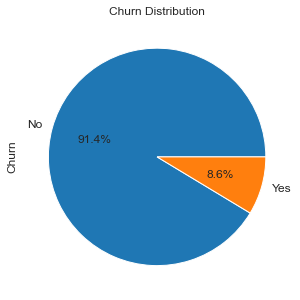

In [49]:
#Churn Distribution
ax = (data_highvalue['churn'].value_counts()*100.0 /len(data_highvalue)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

- The data is imbalance.
- Churn percentage is close 8 and non-churn percentage is close to 92.

In [50]:
#Drop the derived columns
data_highvalue.drop(columns=["total_calls_9","total_data_consumptions"],inplace=True)

### 5.1 Delete columns belong to the 9th month :Churn Month

- After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names.
- These columns contain data for users, where these users are already churned.
- Hence those will not contribute anything to churn prediction.

In [51]:
# drop all 9th month columns
data_highvalue = data_highvalue.filter(regex='[^9]$',axis=1)

In [52]:
# check the baisc info about high value customer
data_highvalue.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 140 columns):
 #   Column              Dtype  
---  ------              -----  
 0   arpu_6              float64
 1   arpu_7              float64
 2   arpu_8              float64
 3   onnet_mou_6         float64
 4   onnet_mou_7         float64
 5   onnet_mou_8         float64
 6   offnet_mou_6        float64
 7   offnet_mou_7        float64
 8   offnet_mou_8        float64
 9   roam_ic_mou_6       float64
 10  roam_ic_mou_7       float64
 11  roam_ic_mou_8       float64
 12  roam_og_mou_6       float64
 13  roam_og_mou_7       float64
 14  roam_og_mou_8       float64
 15  loc_og_t2t_mou_6    float64
 16  loc_og_t2t_mou_7    float64
 17  loc_og_t2t_mou_8    float64
 18  loc_og_t2m_mou_6    float64
 19  loc_og_t2m_mou_7    float64
 20  loc_og_t2m_mou_8    float64
 21  loc_og_t2f_mou_6    float64
 22  loc_og_t2f_mou_7    float64
 23  loc_og_t2f_mou_8    float64
 24  loc_og_t2c_mou_6    float64

In [53]:
data_highvalue.shape

(30011, 140)

**Now we have 30,011 rows of records and 140 columns are available to explore.**

## 6. Exploratory Data Analysis

In [54]:
# Check the percenatges of churn and non-churn customers
data_highvalue["churn"].value_counts(normalize=True)

0    0.913598
1    0.086402
Name: churn, dtype: float64

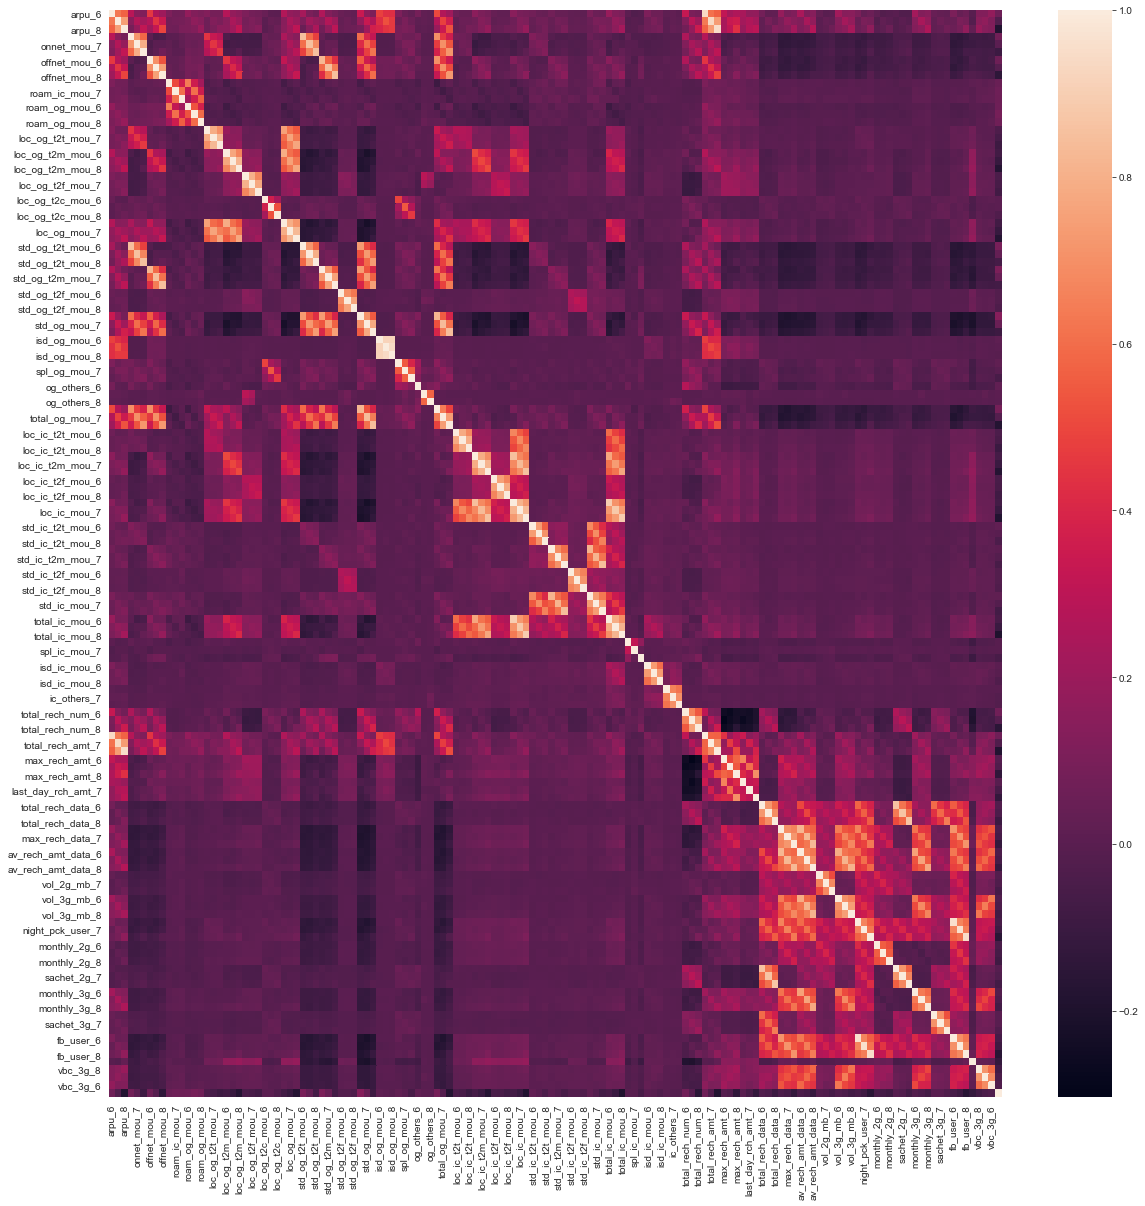

In [55]:
#Check heatmap for correlation

plt.figure(figsize=(20,20))
sns.heatmap(data_highvalue.corr())

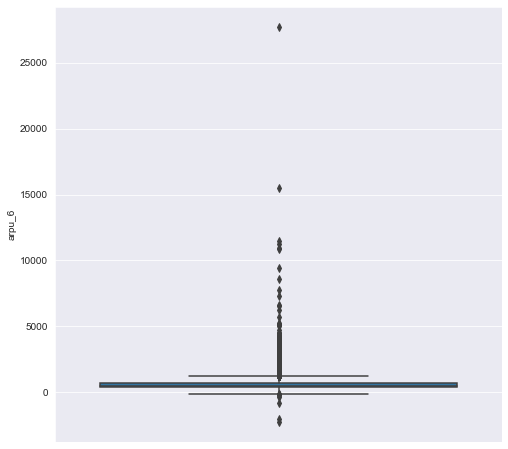

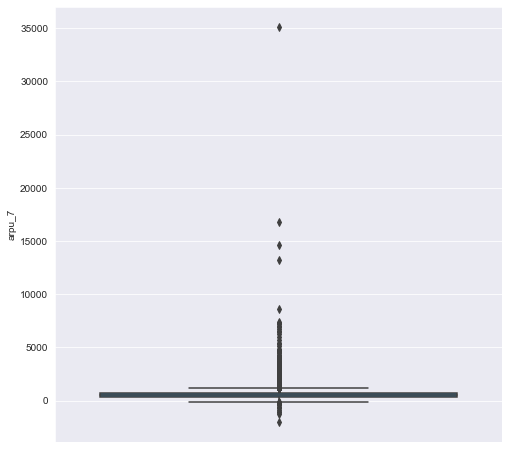

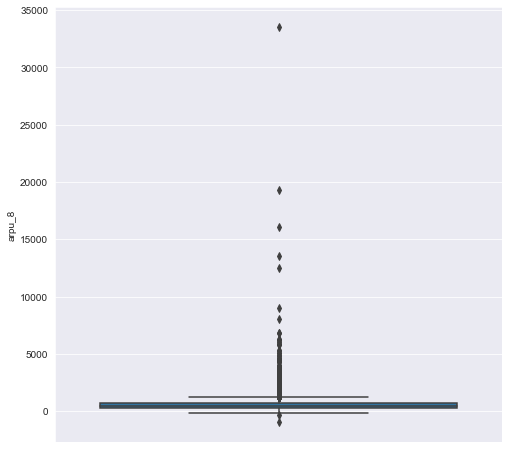

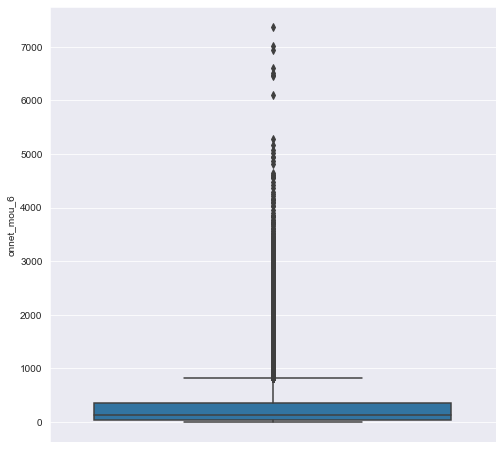

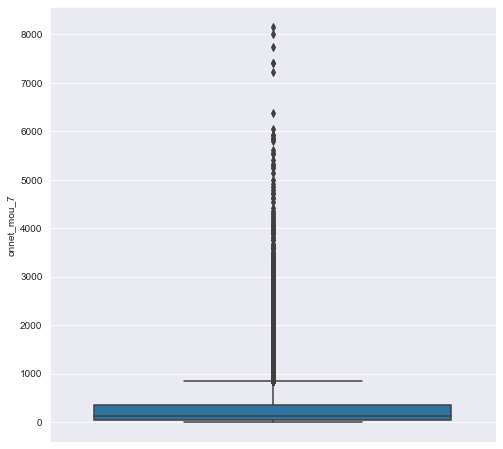

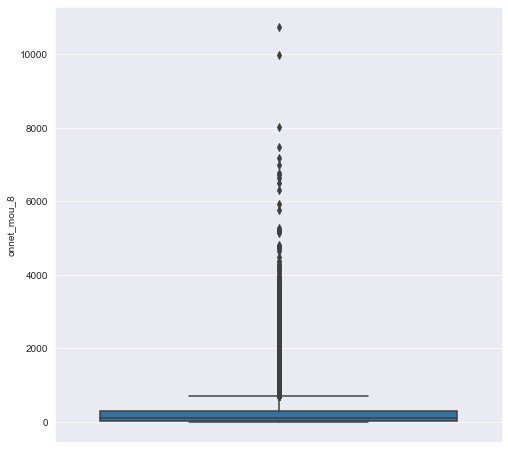

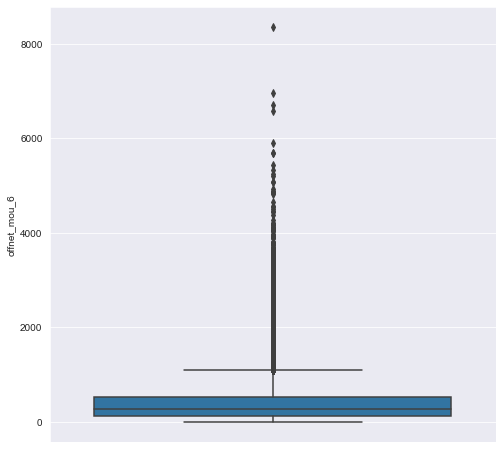

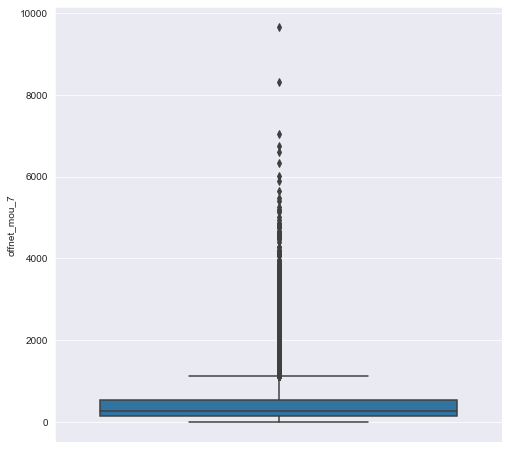

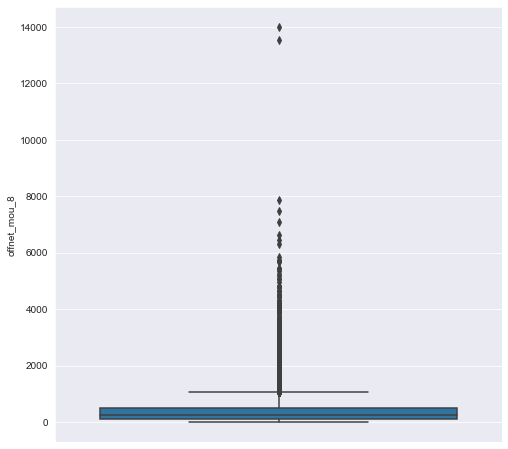

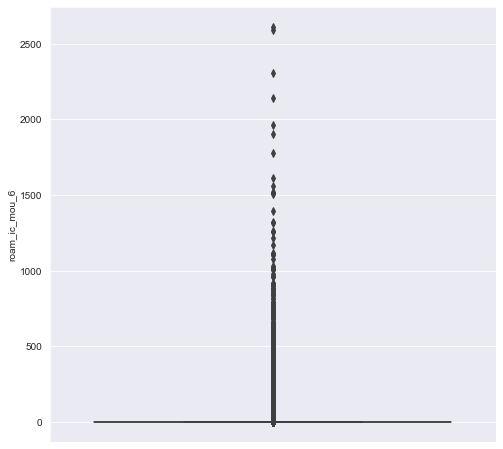

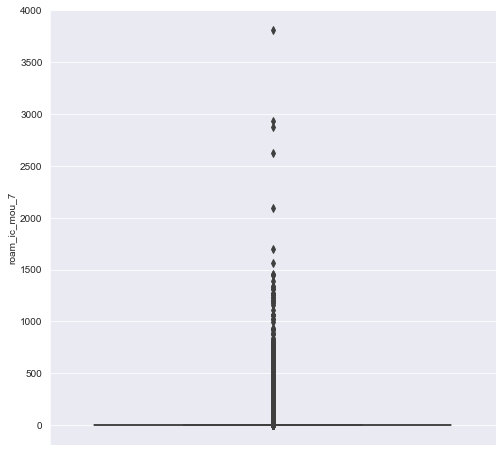

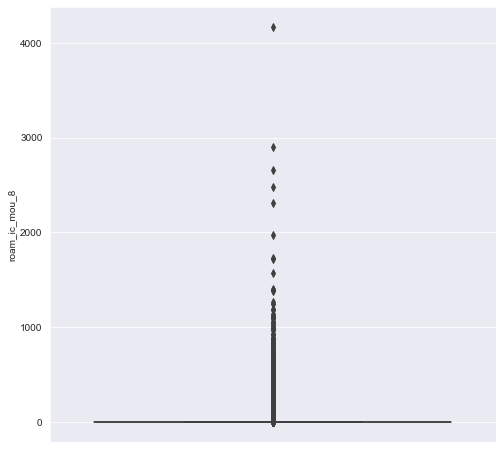

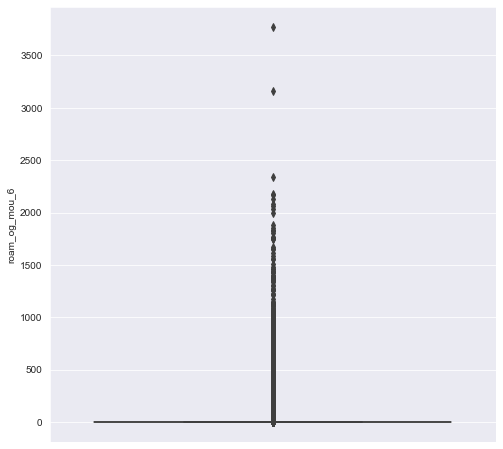

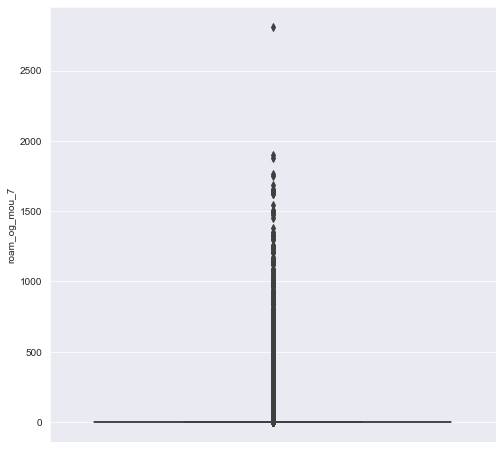

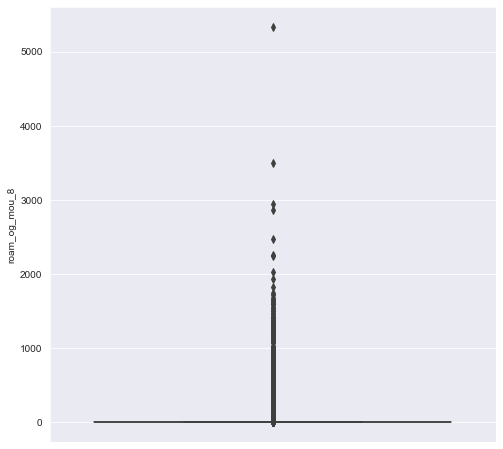

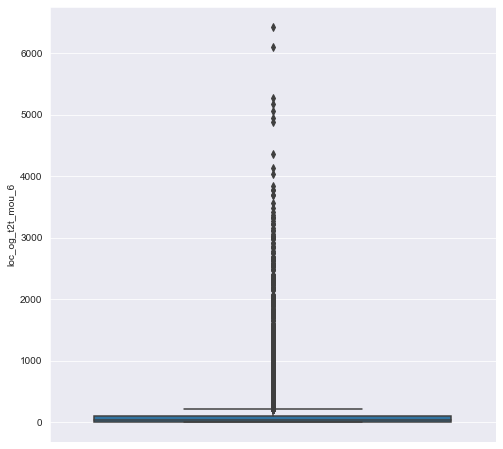

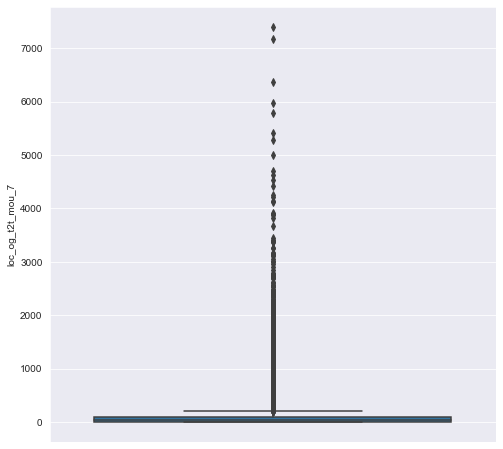

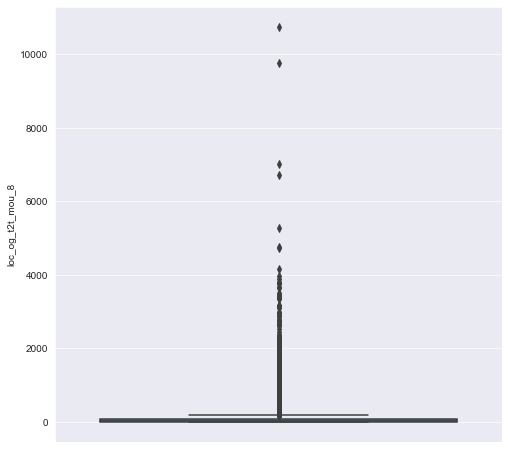

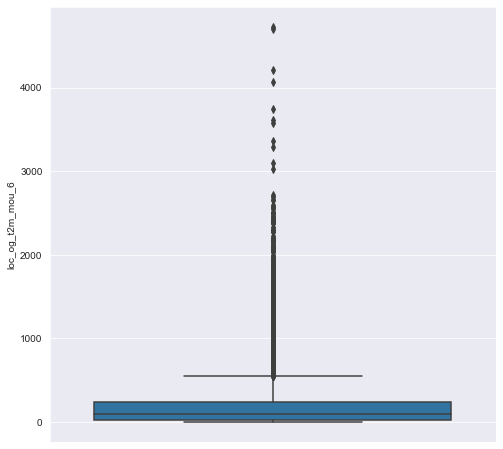

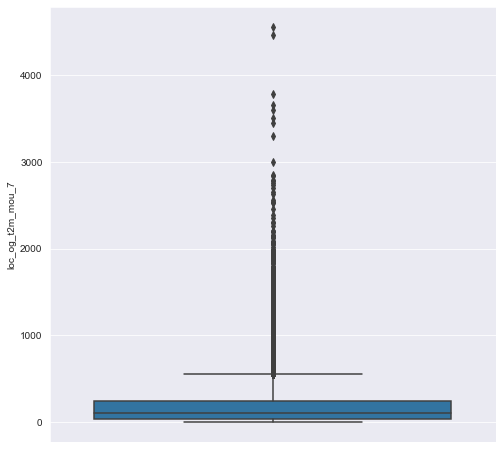

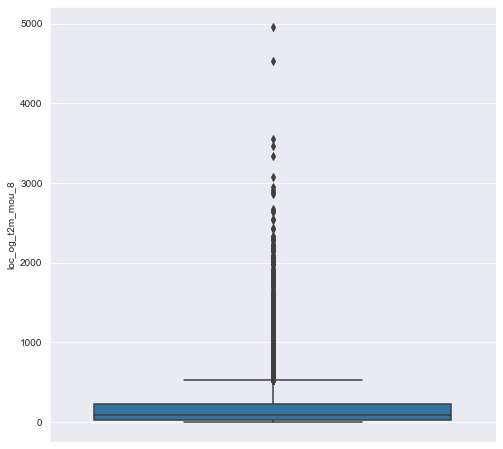

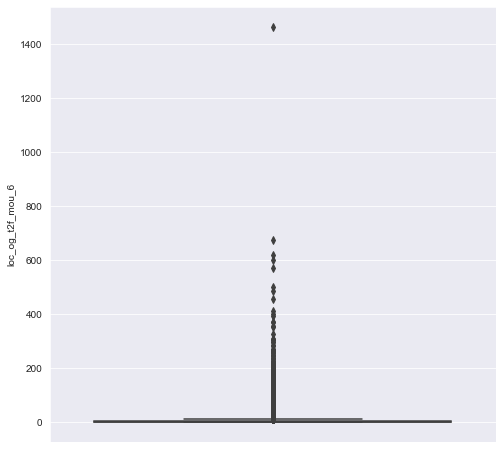

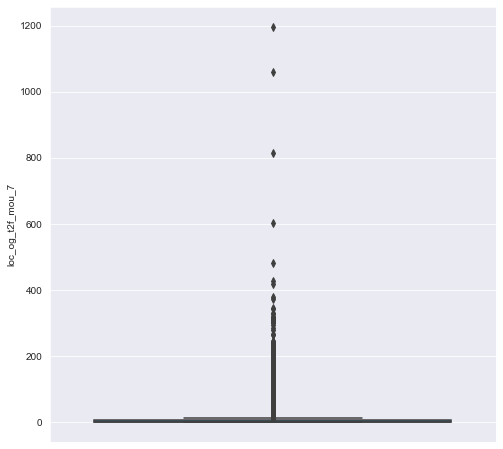

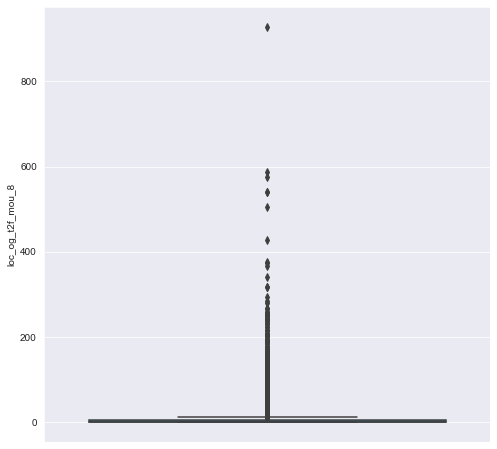

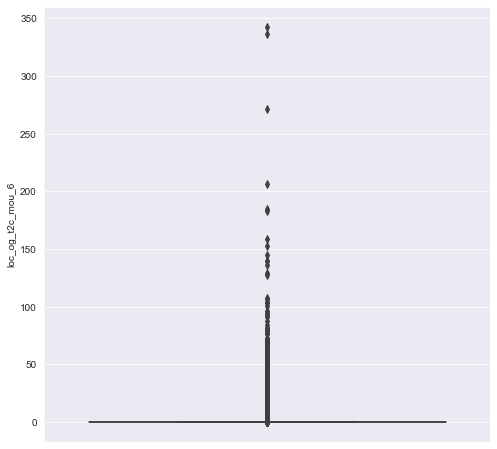

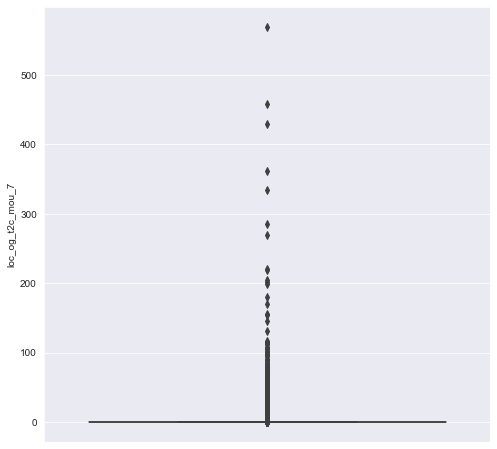

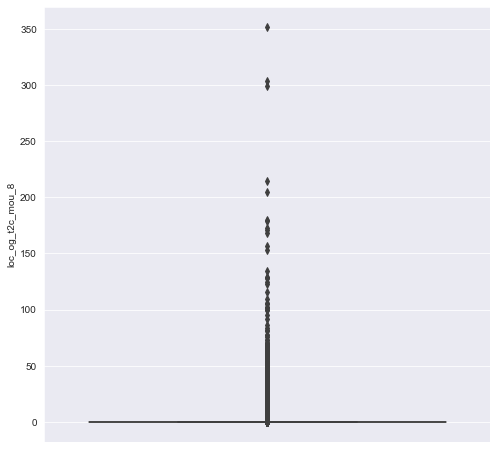

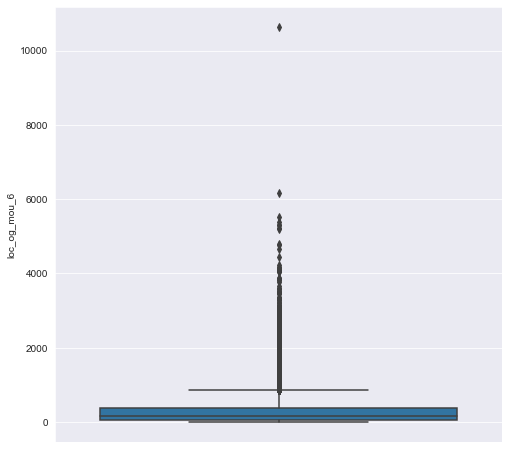

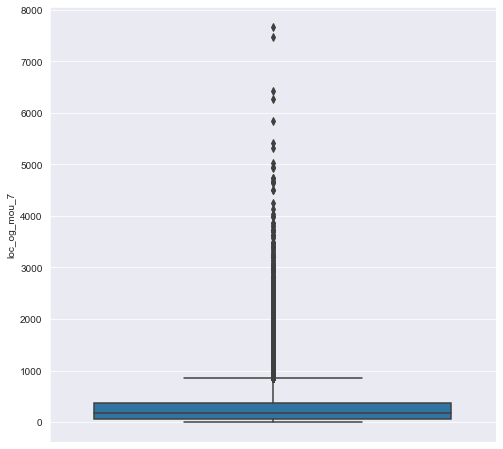

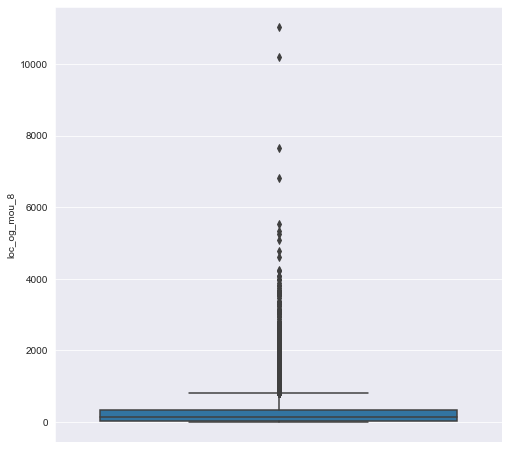

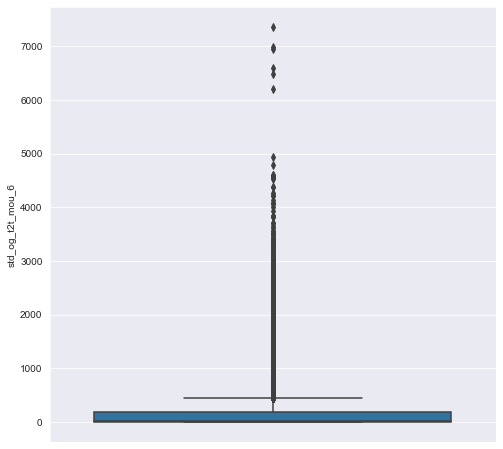

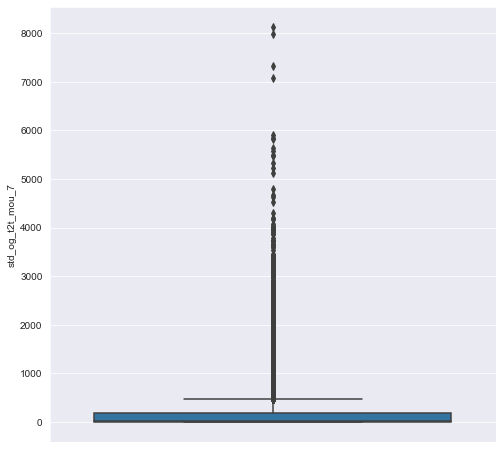

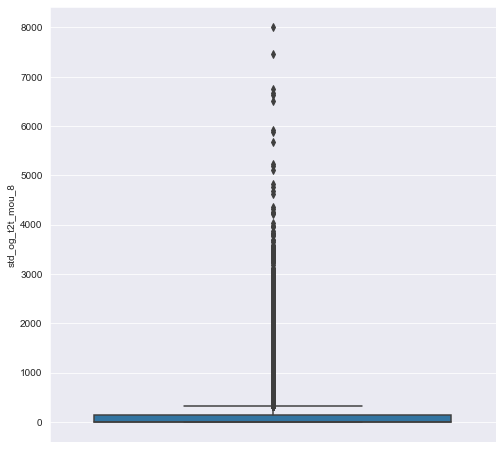

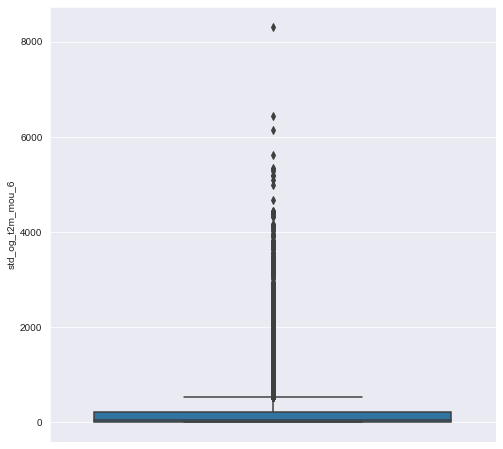

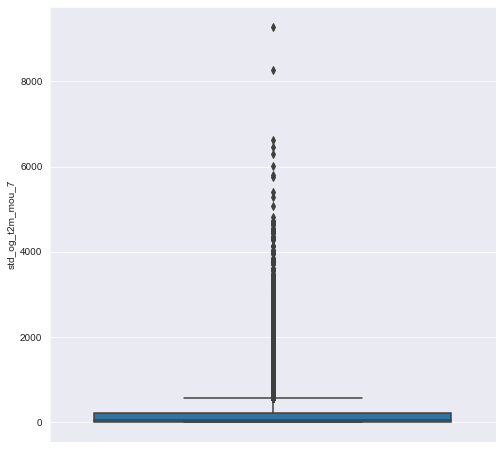

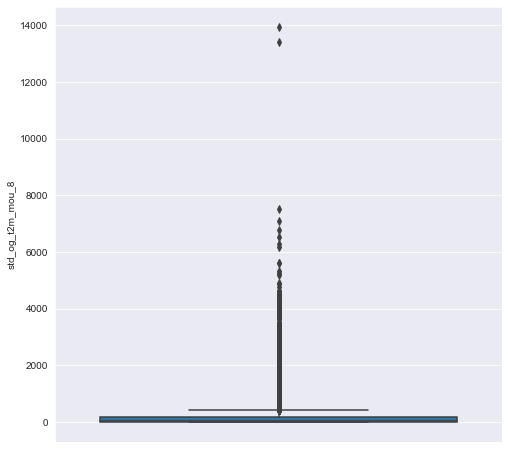

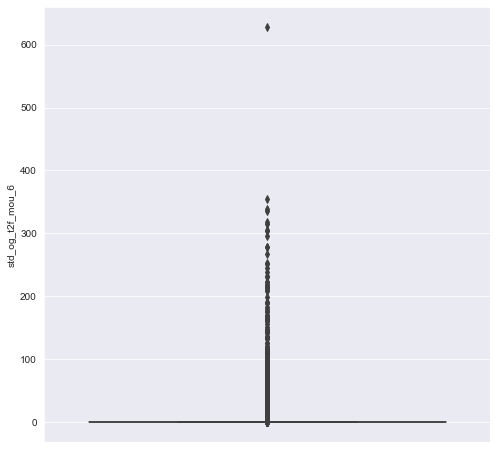

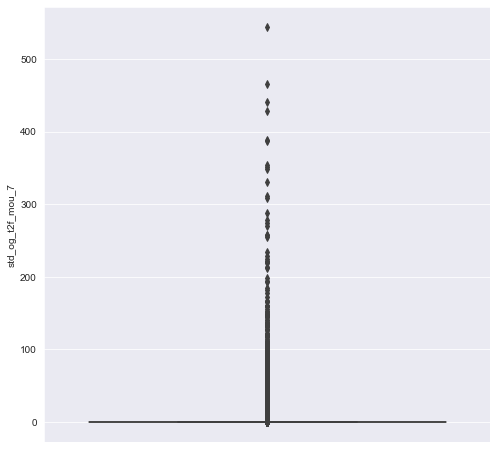

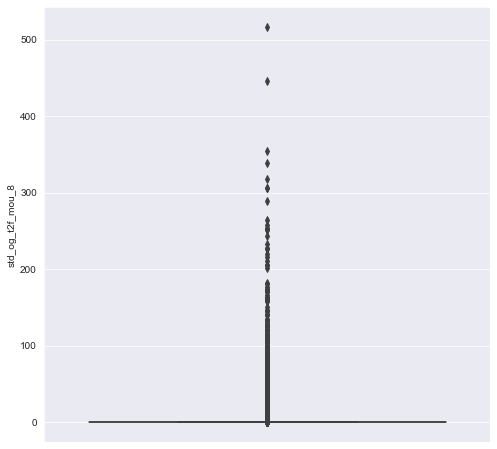

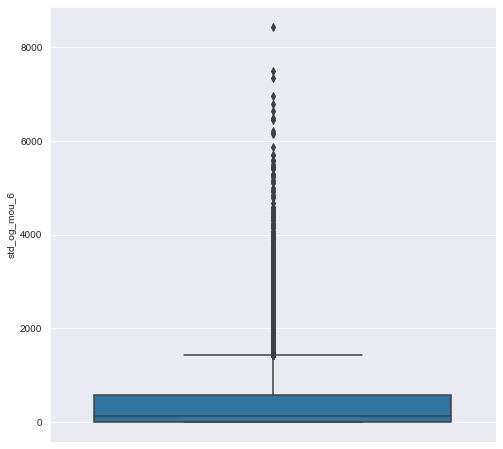

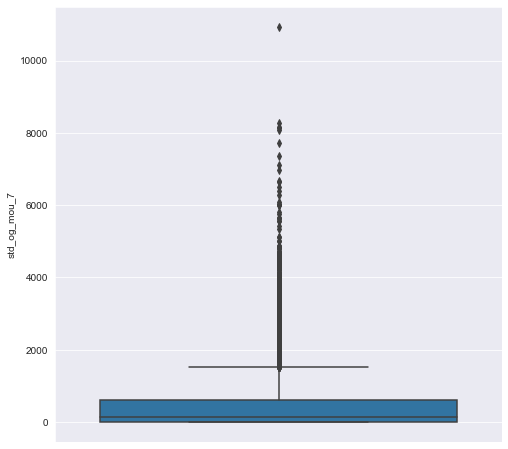

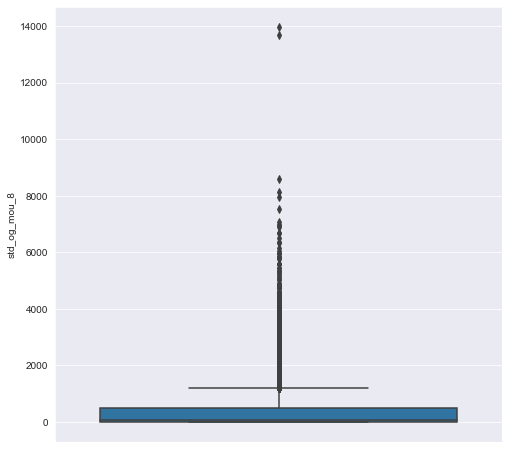

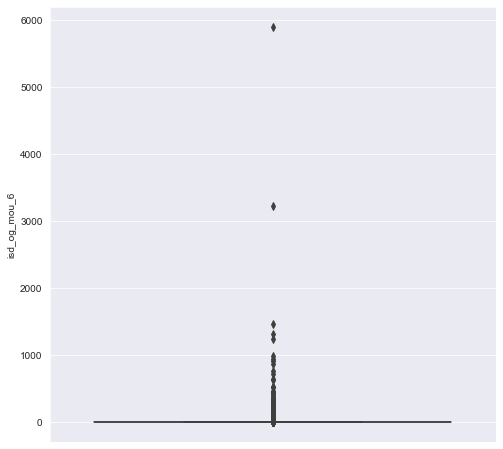

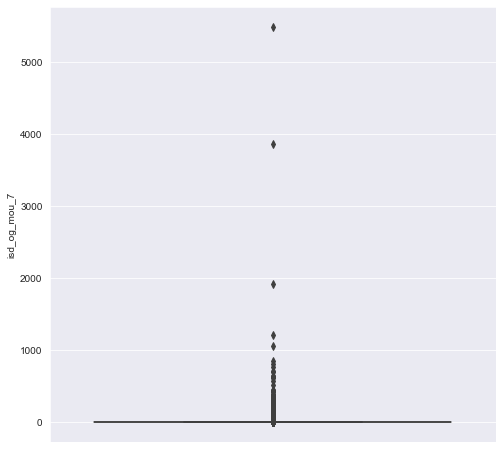

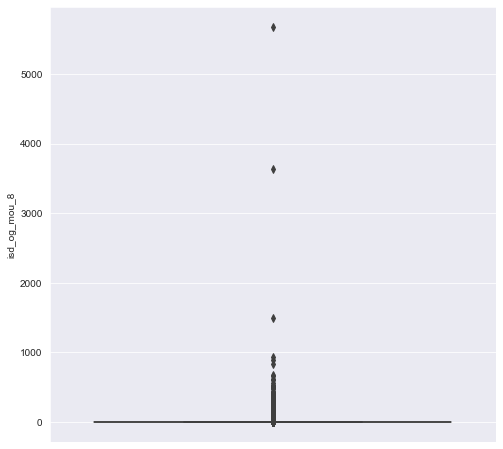

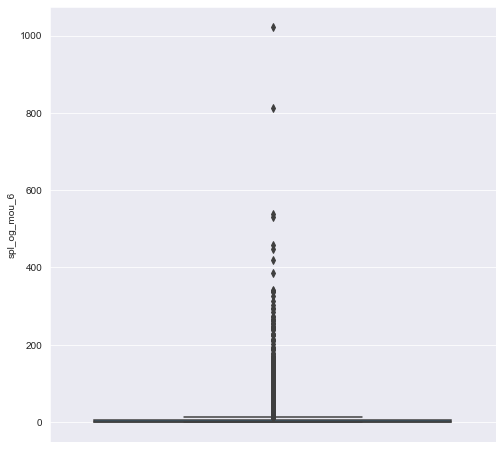

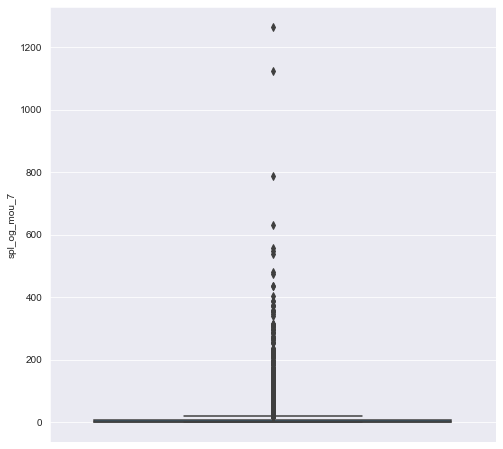

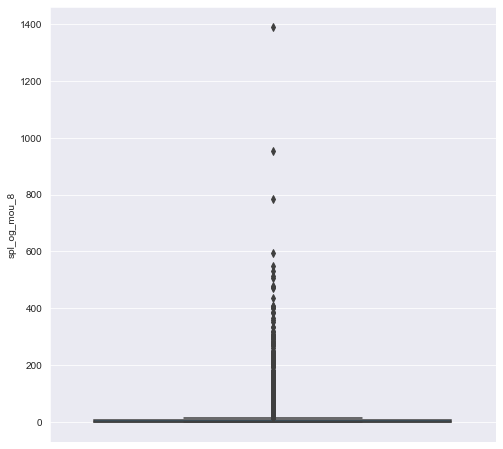

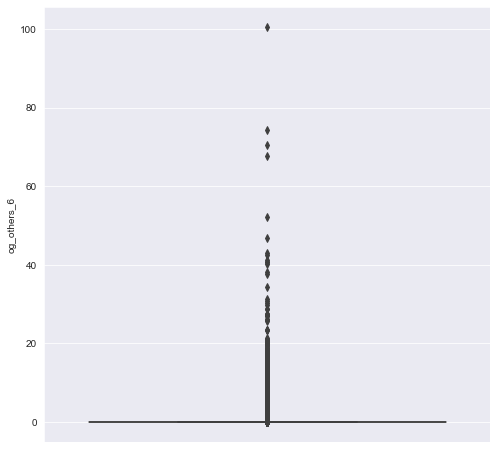

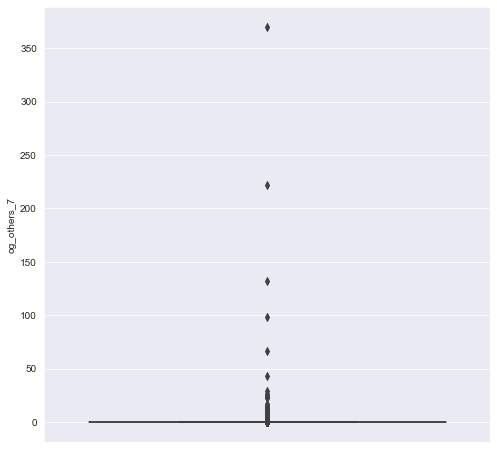

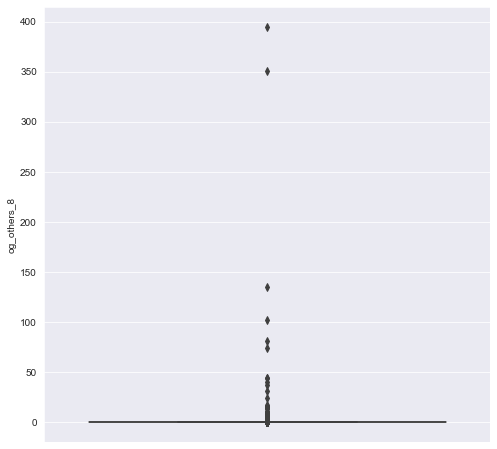

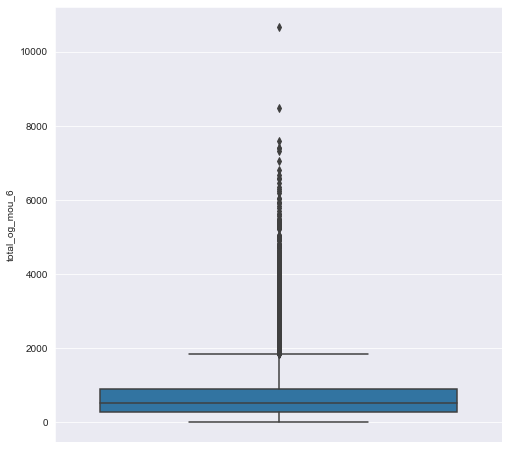

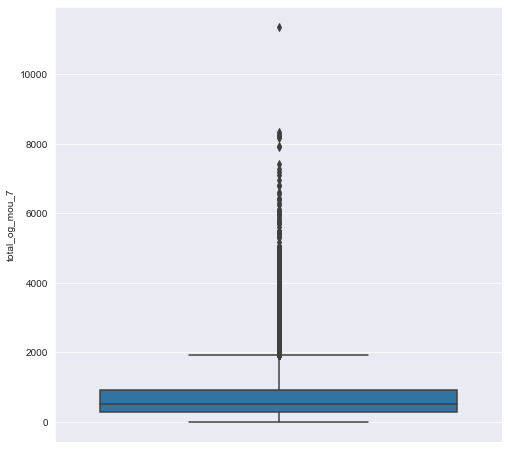

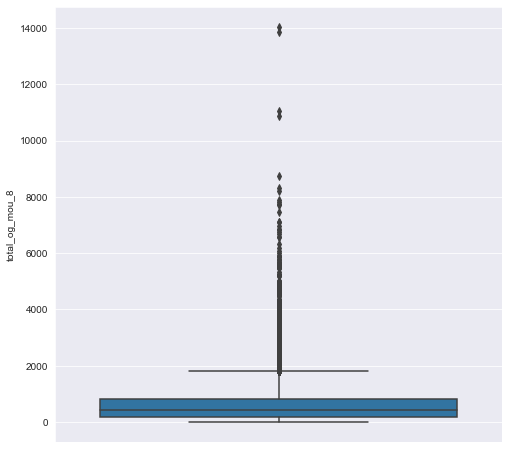

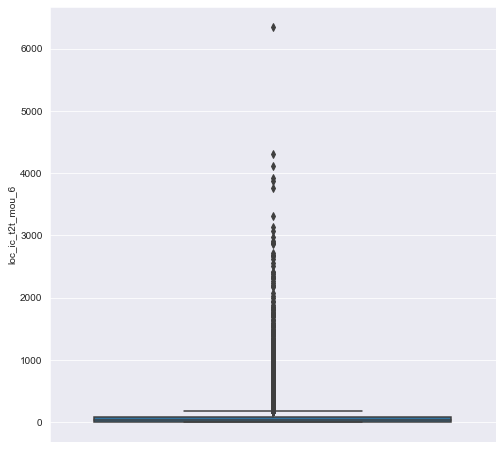

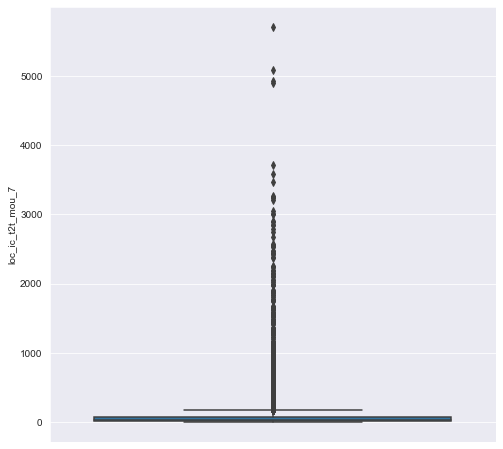

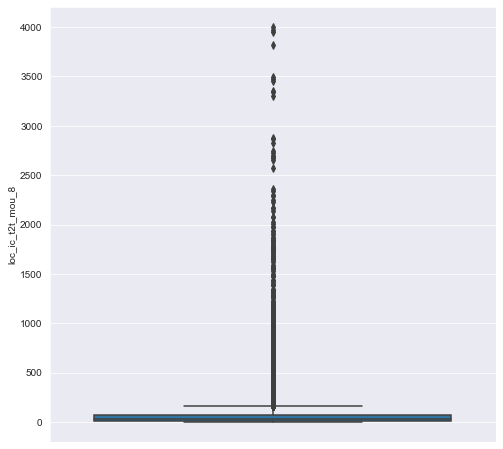

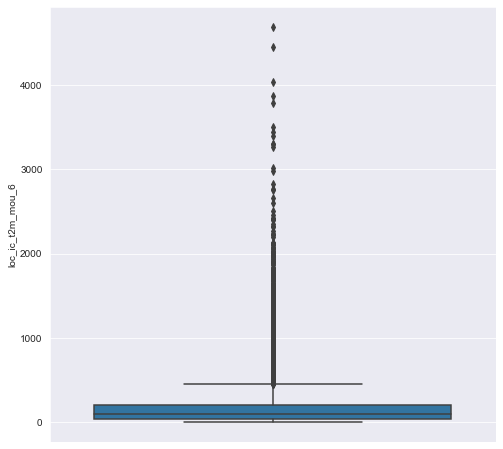

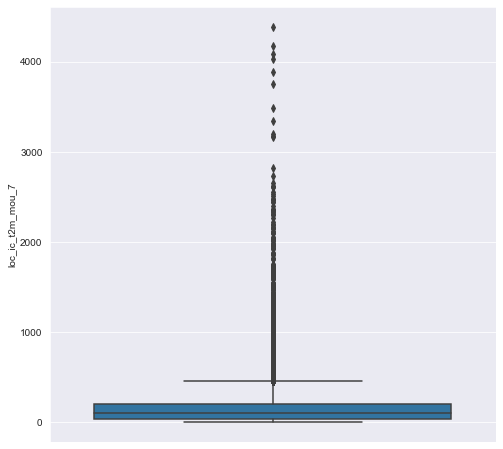

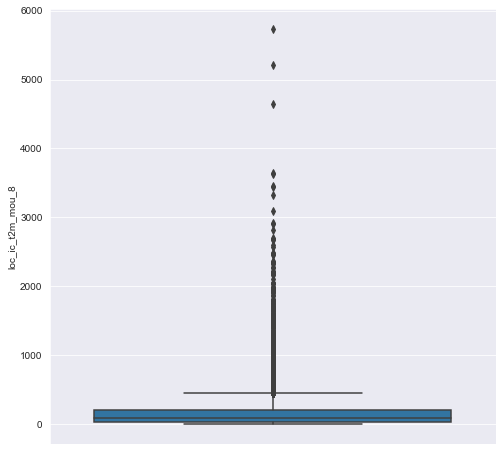

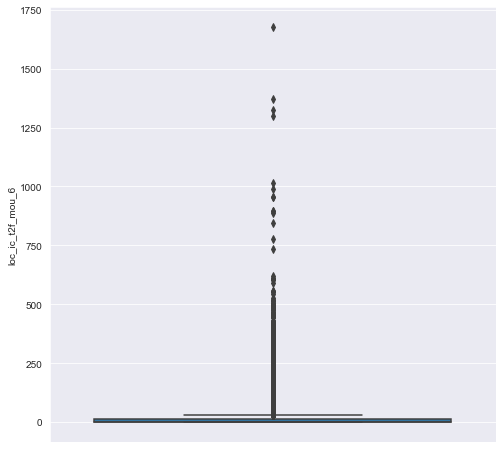

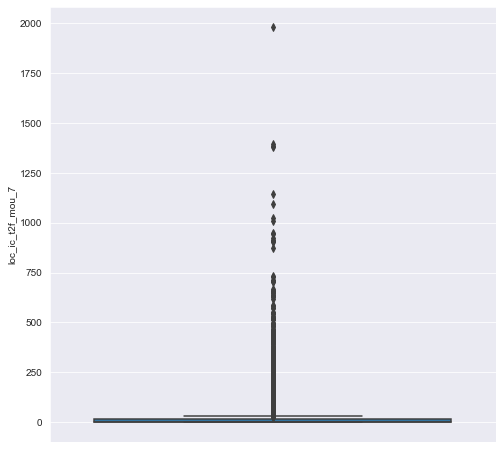

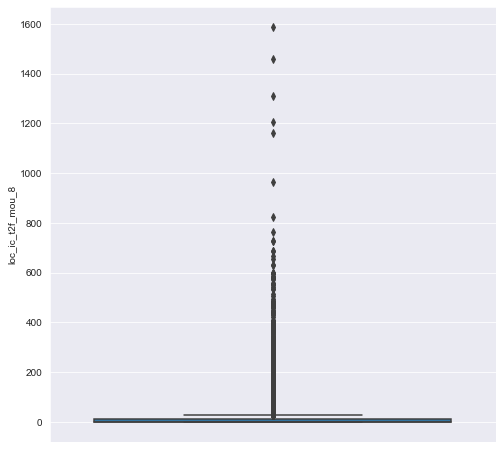

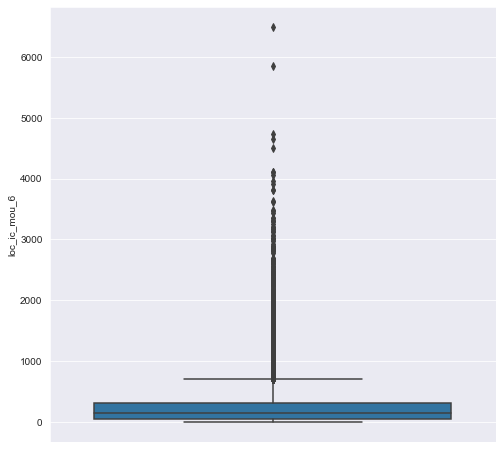

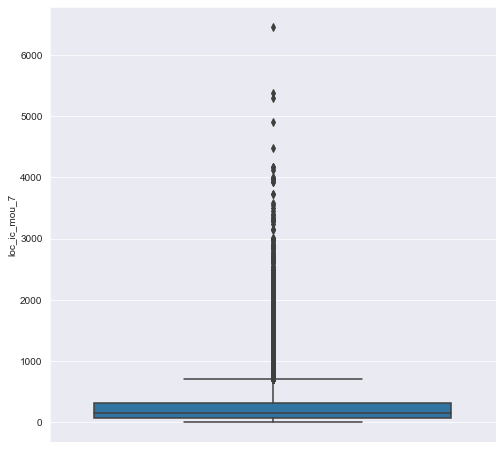

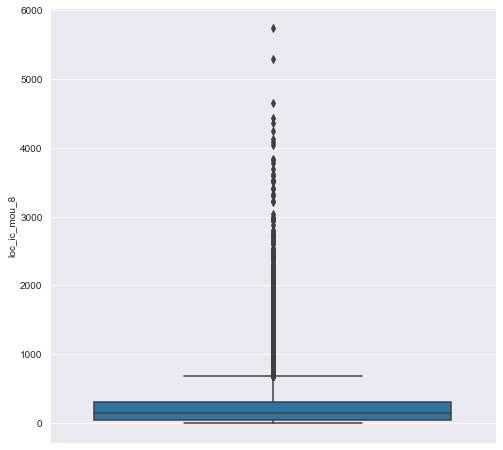

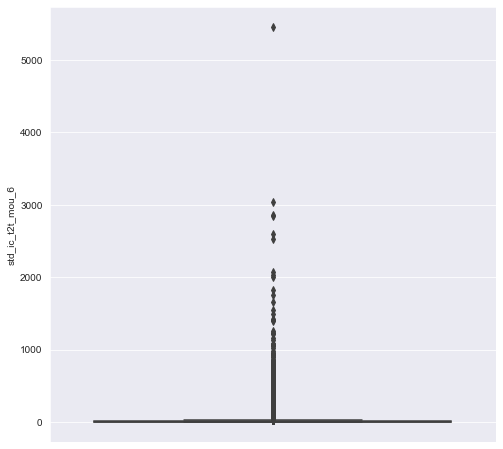

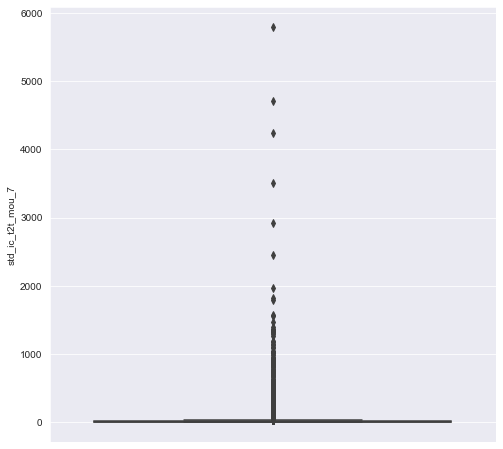

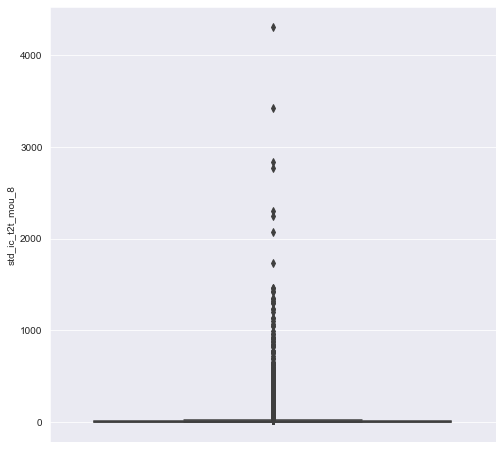

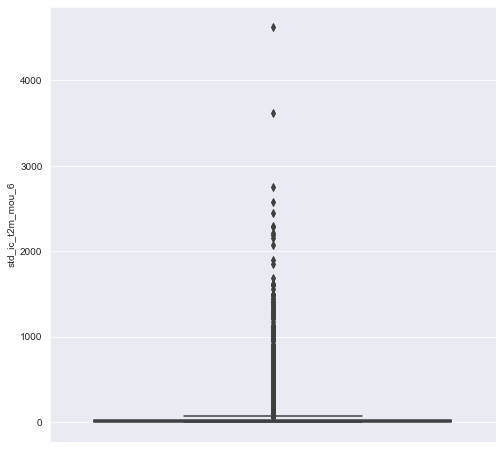

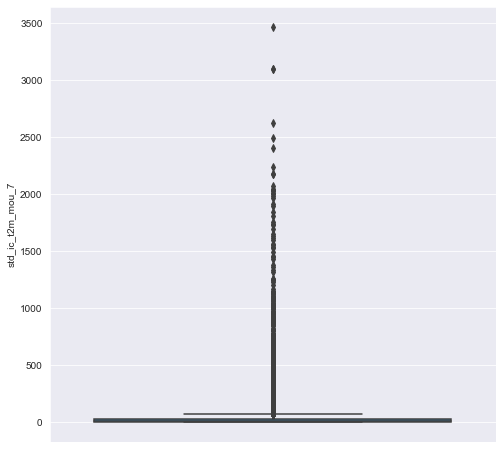

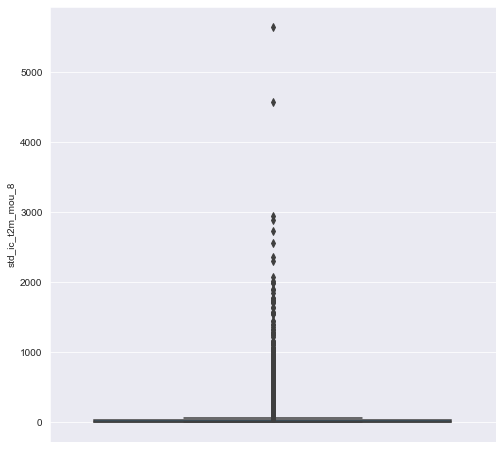

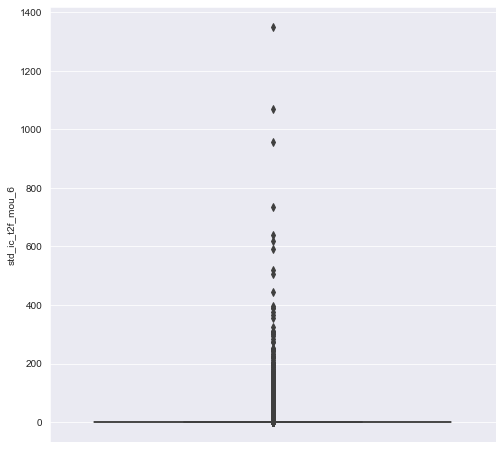

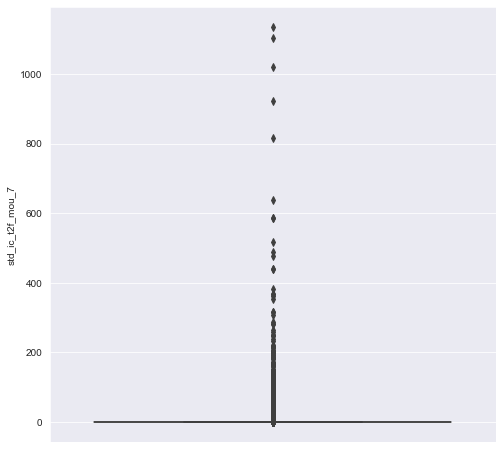

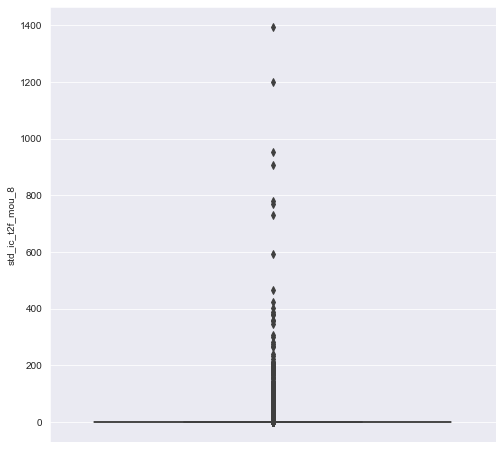

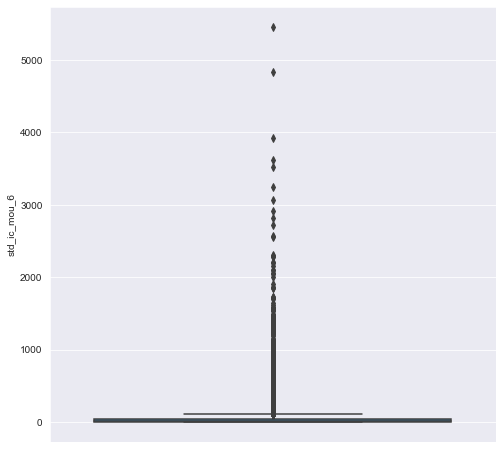

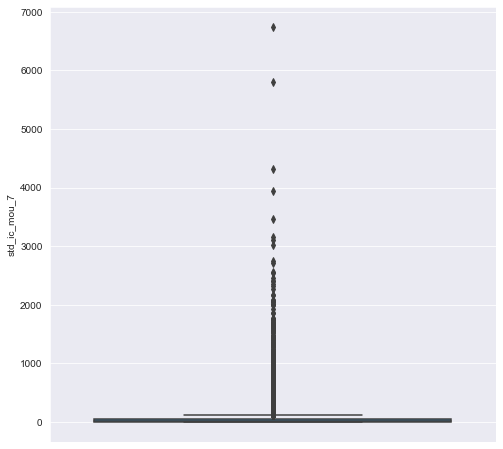

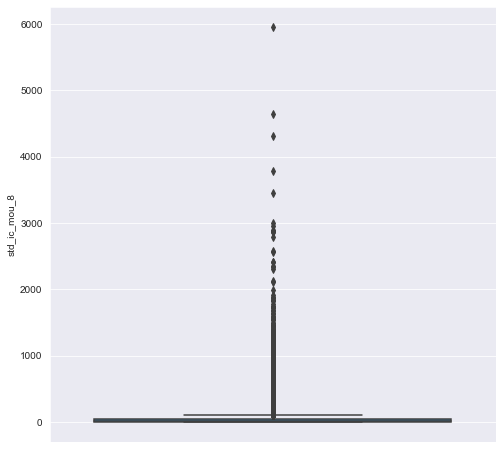

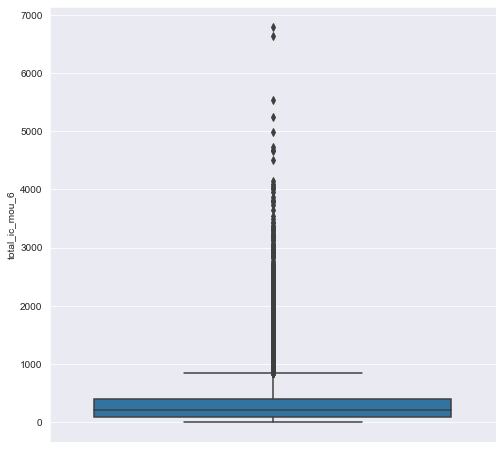

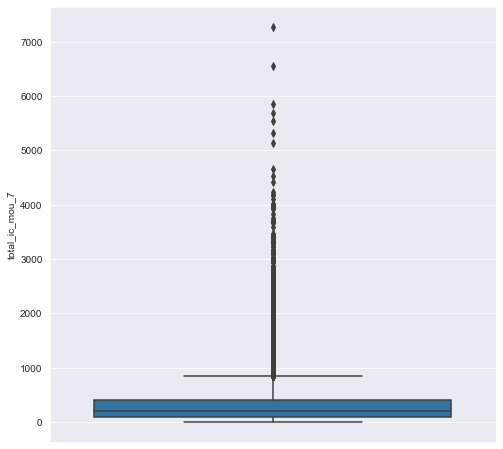

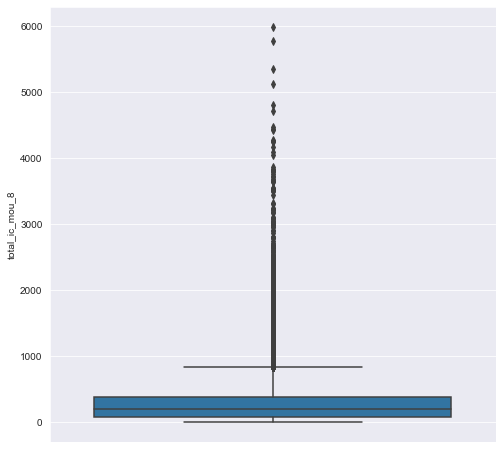

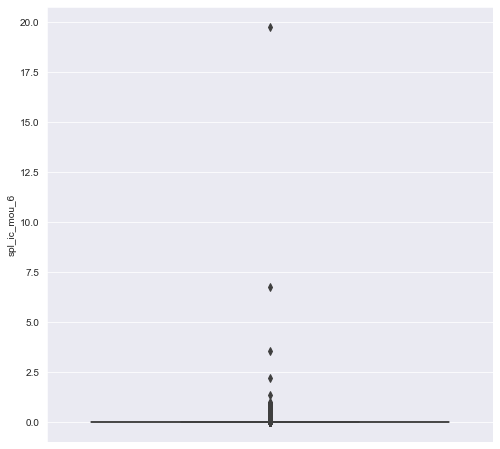

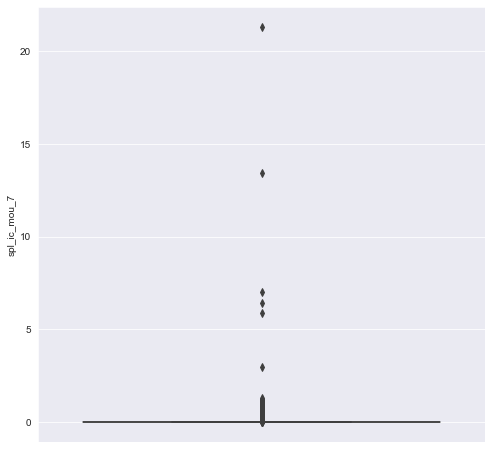

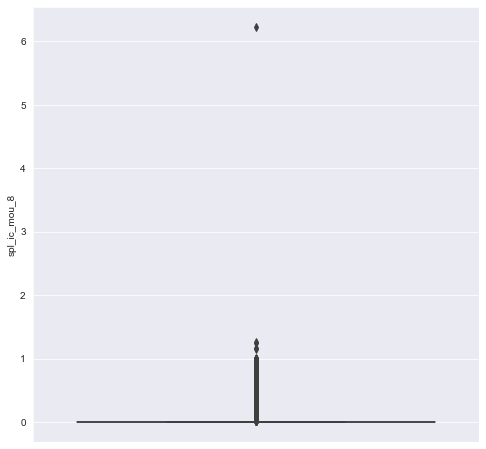

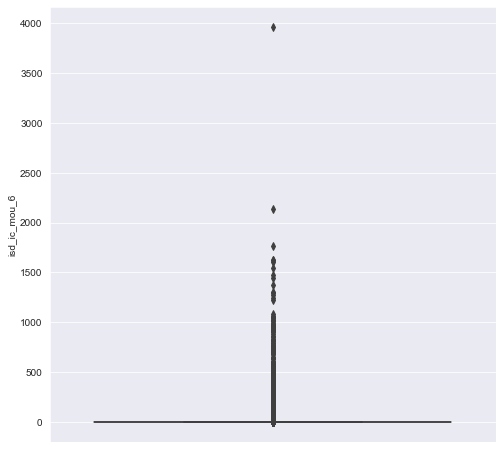

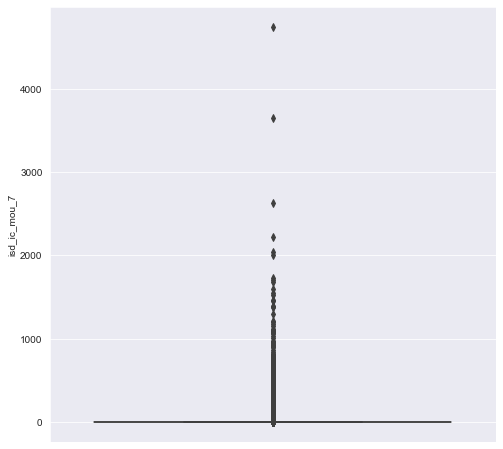

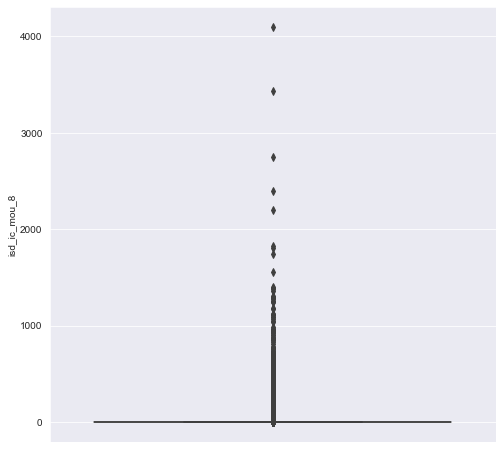

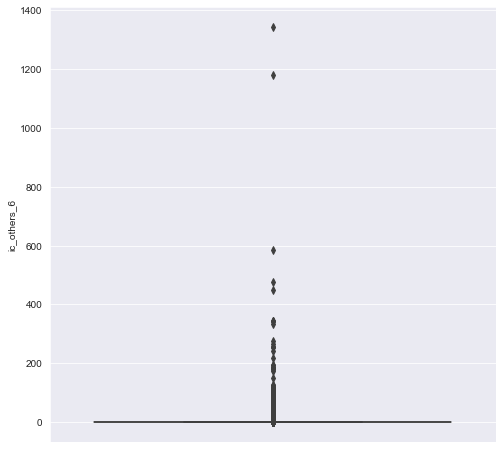

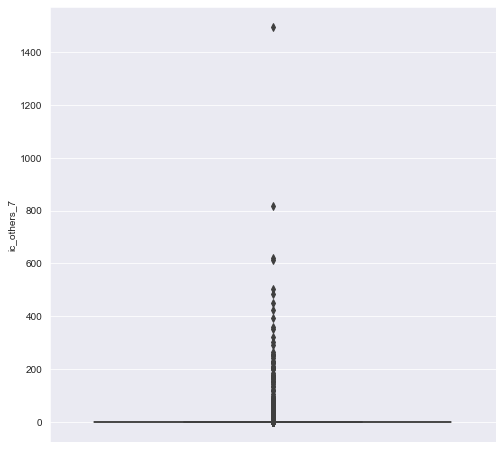

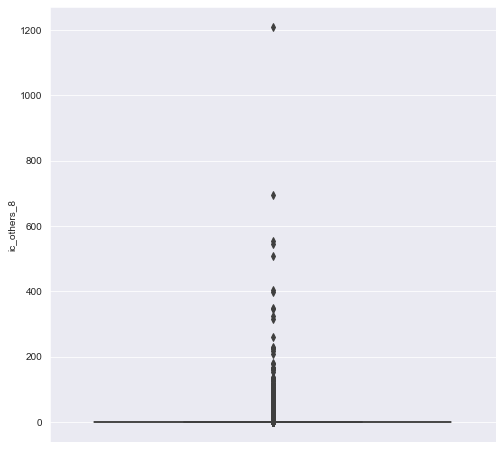

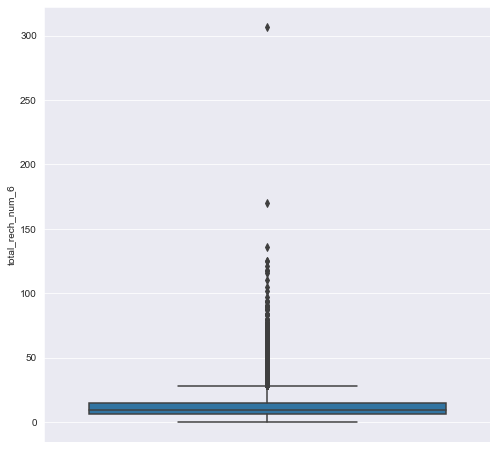

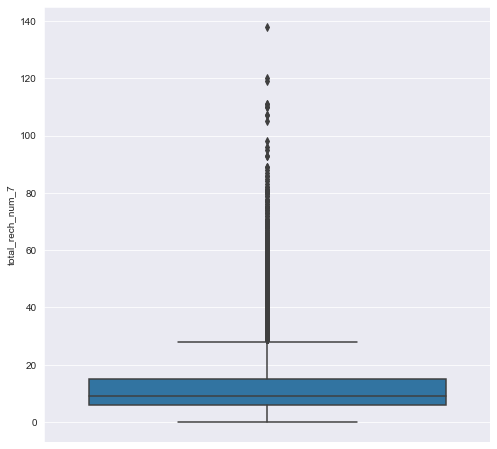

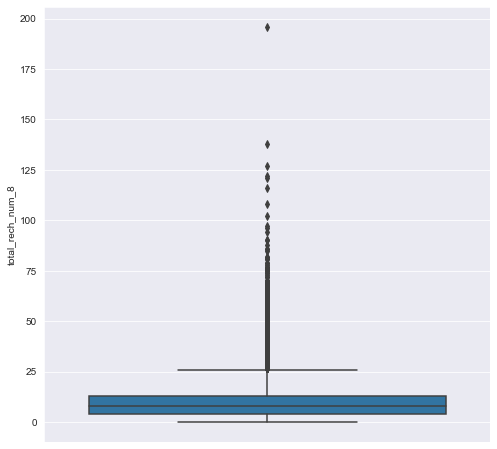

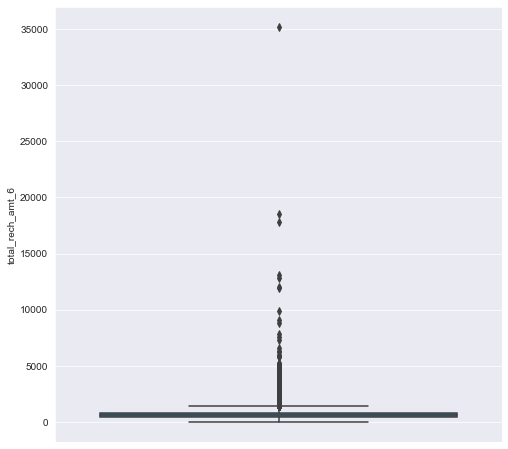

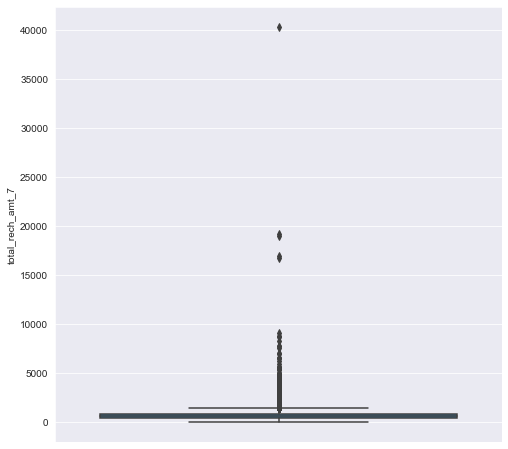

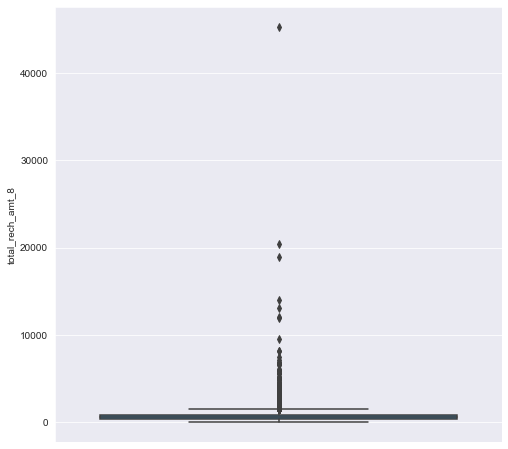

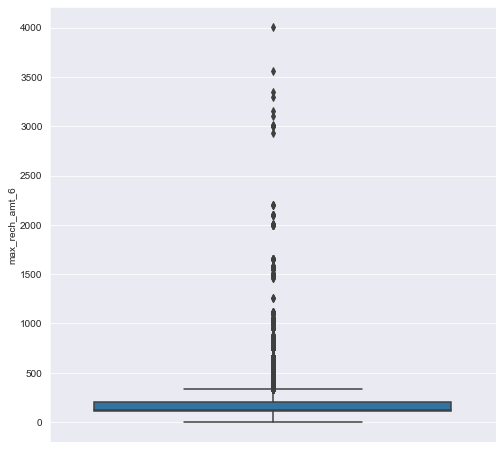

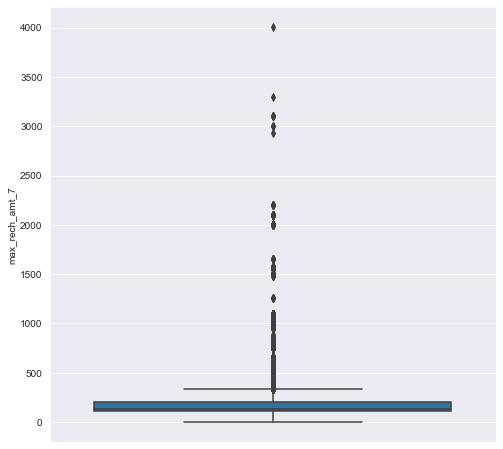

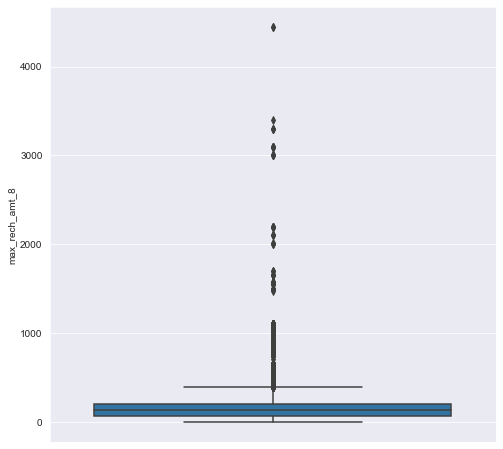

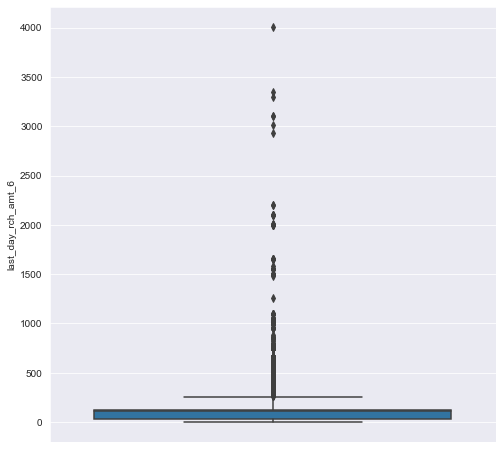

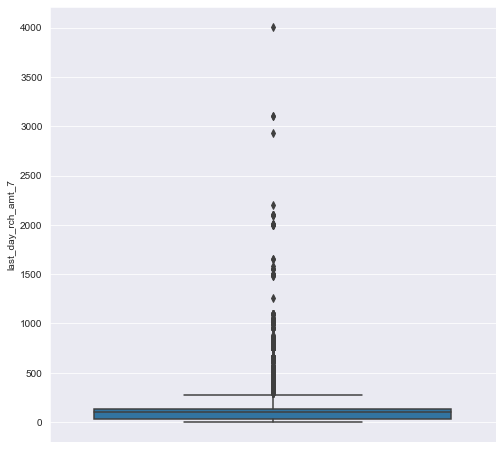

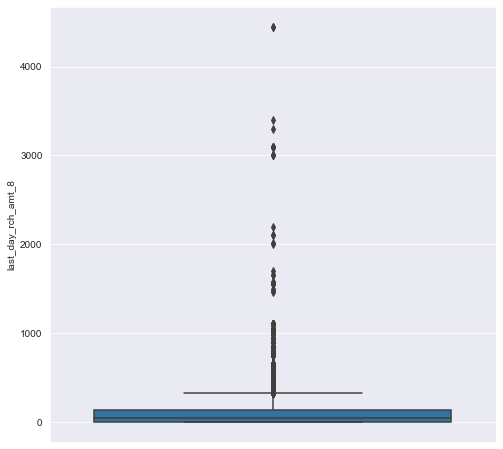

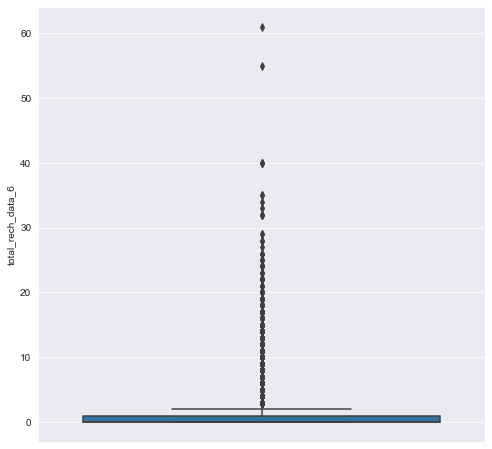

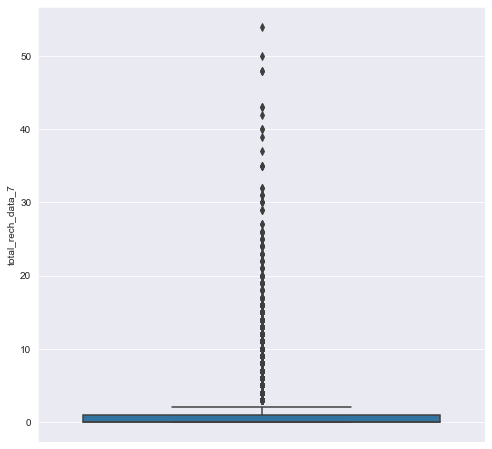

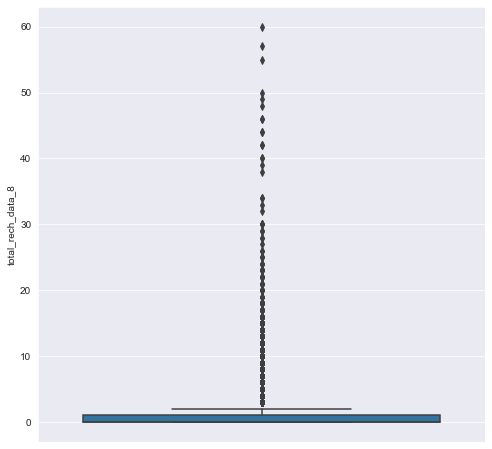

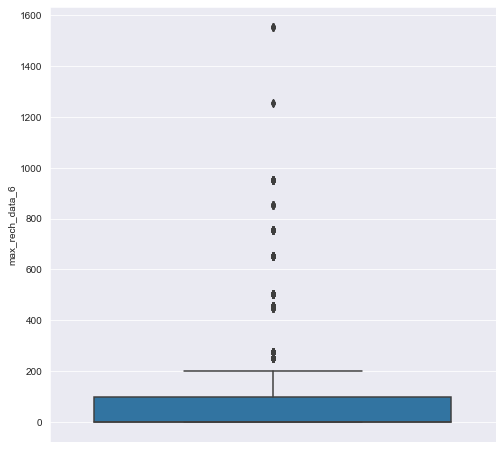

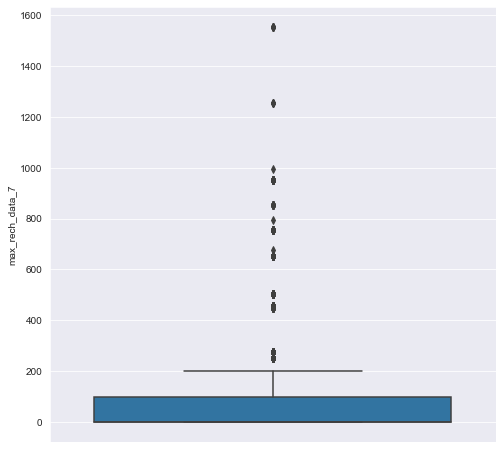

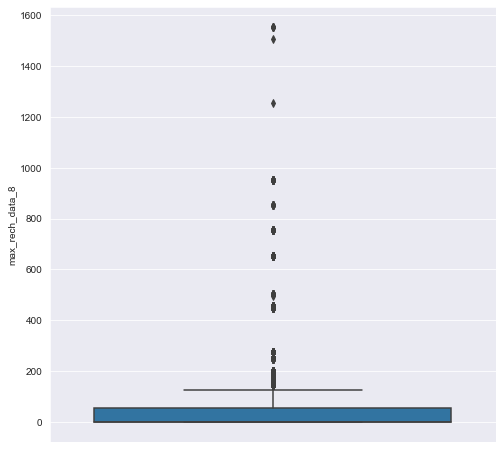

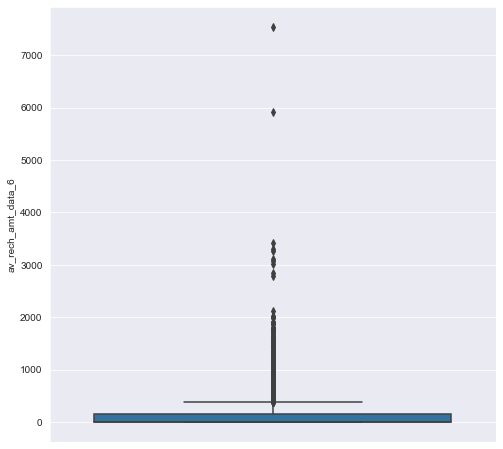

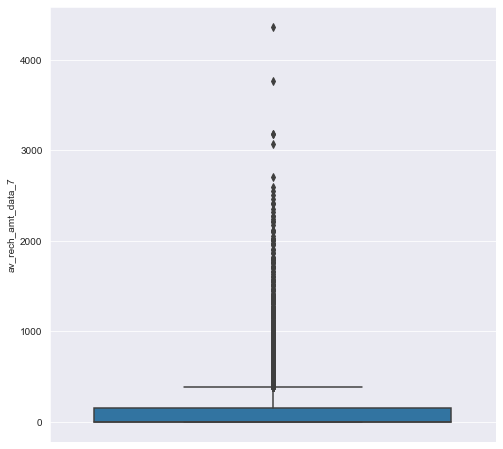

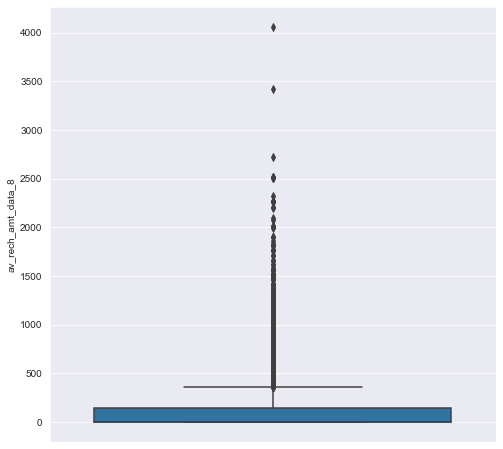

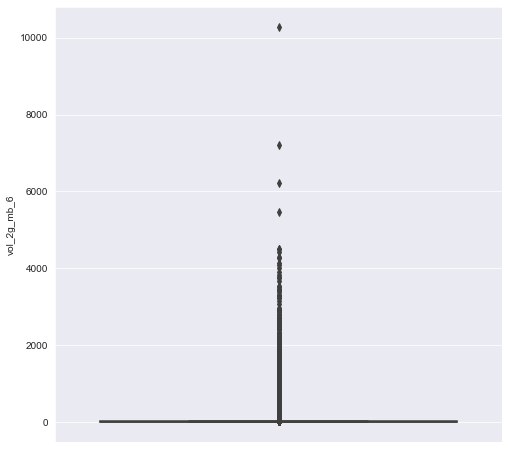

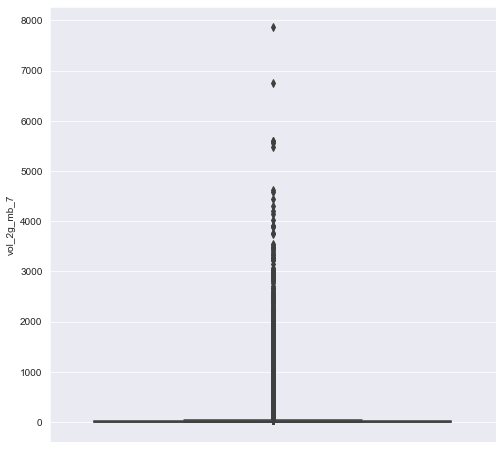

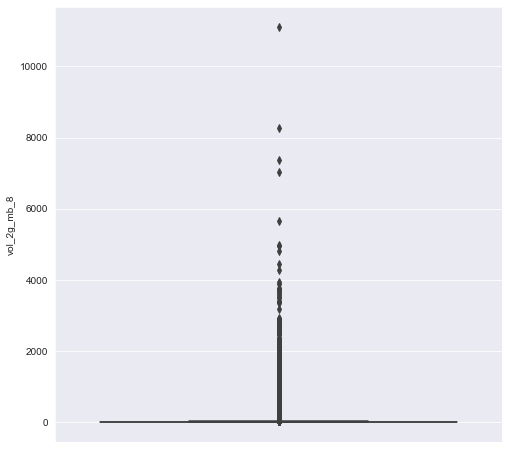

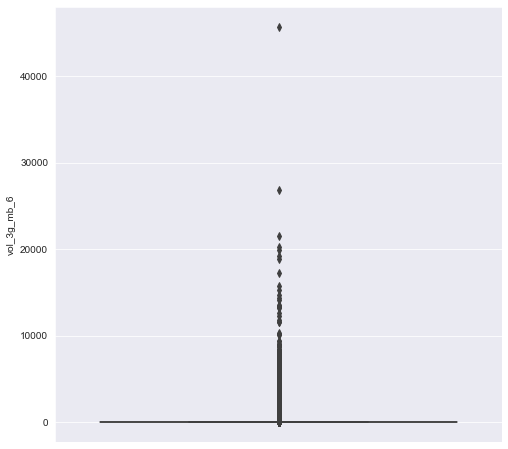

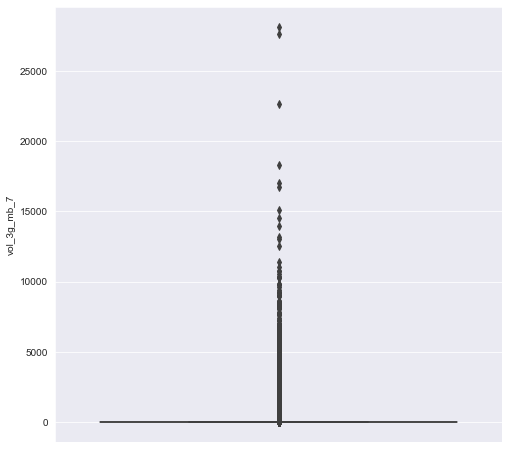

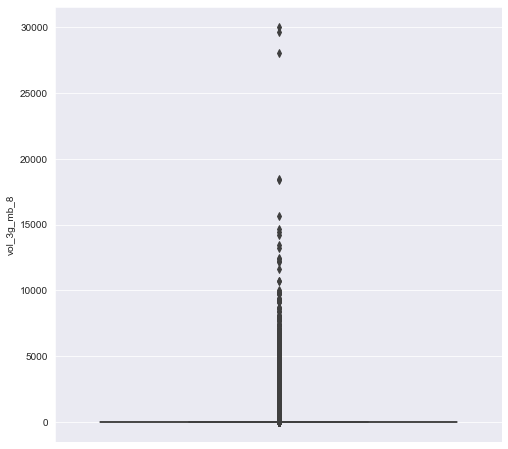

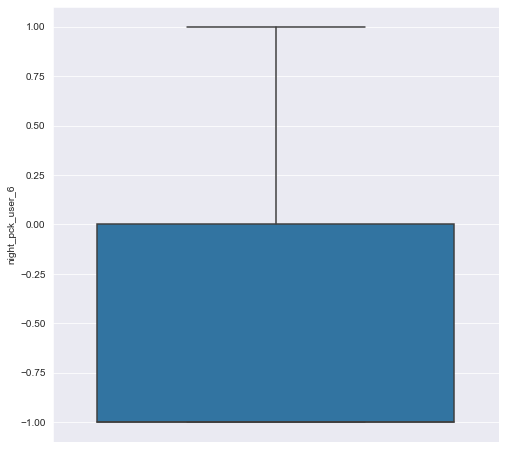

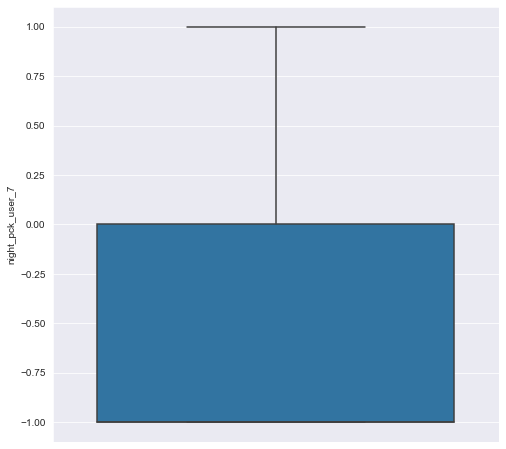

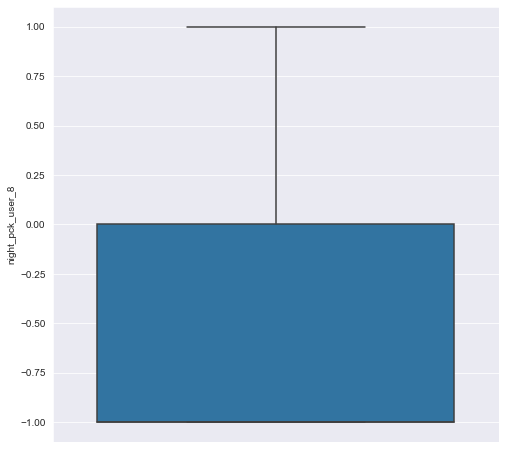

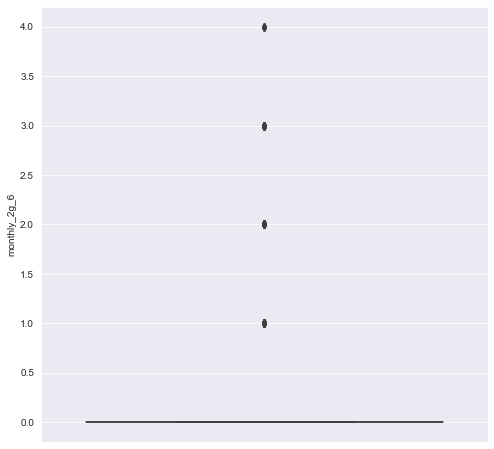

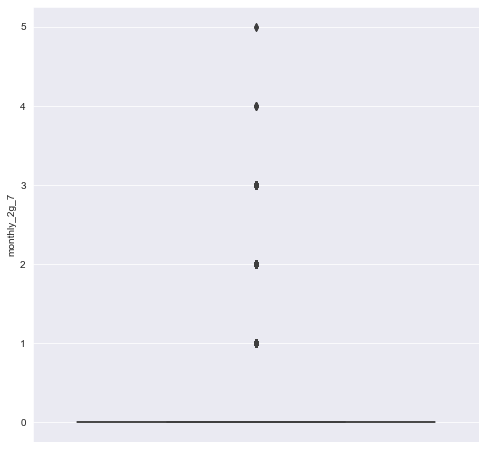

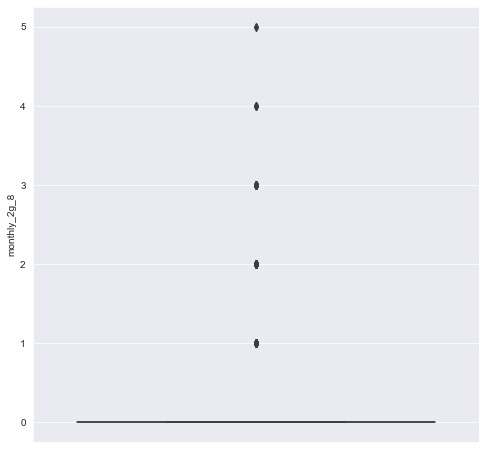

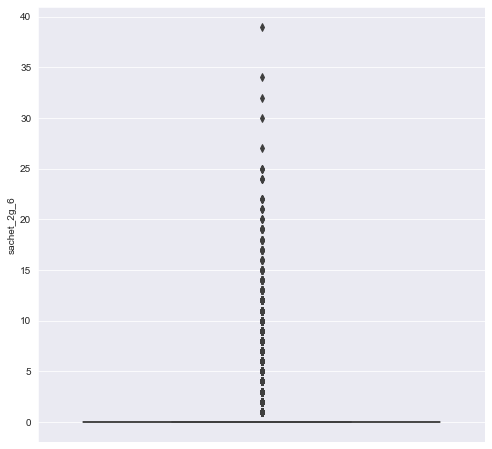

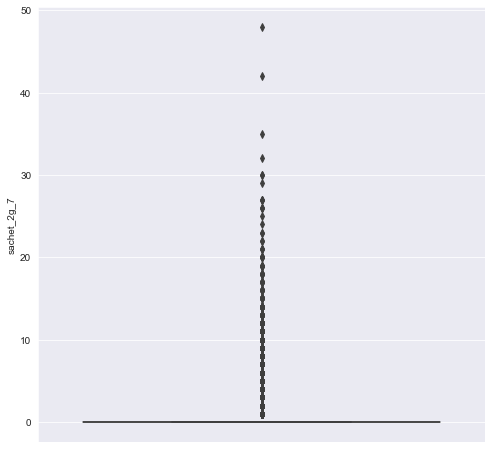

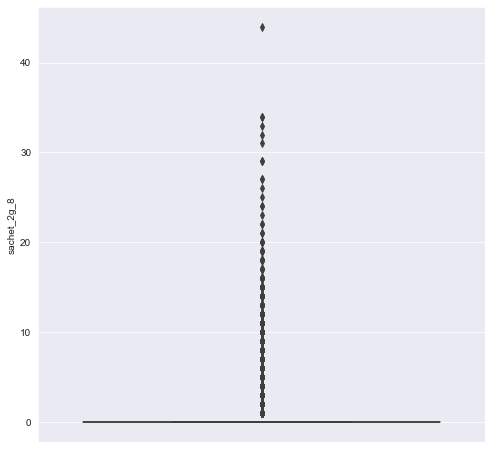

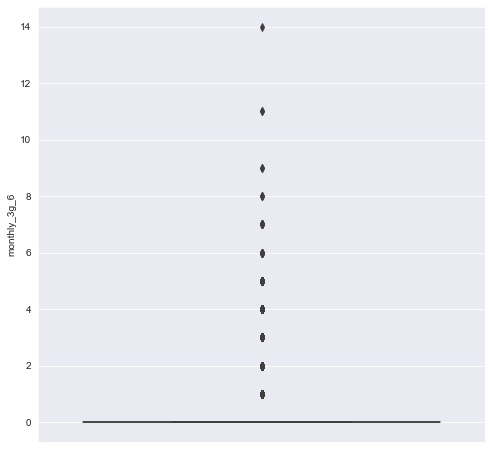

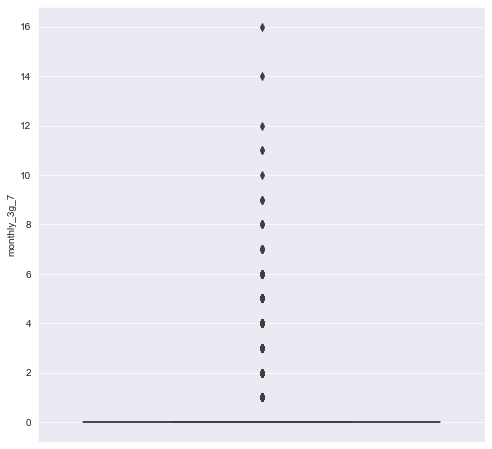

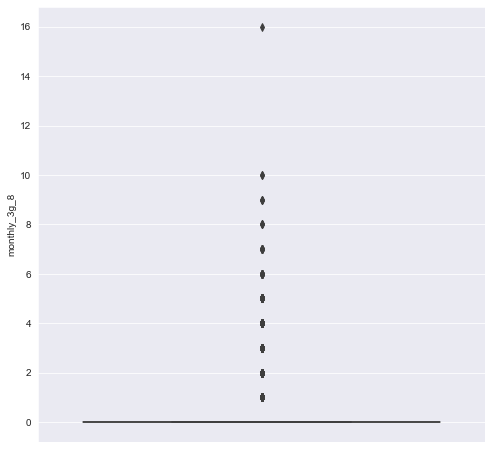

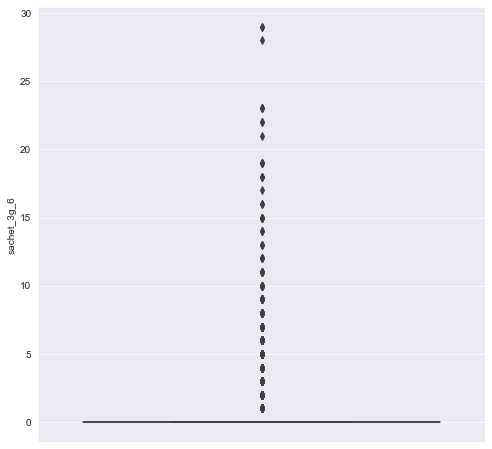

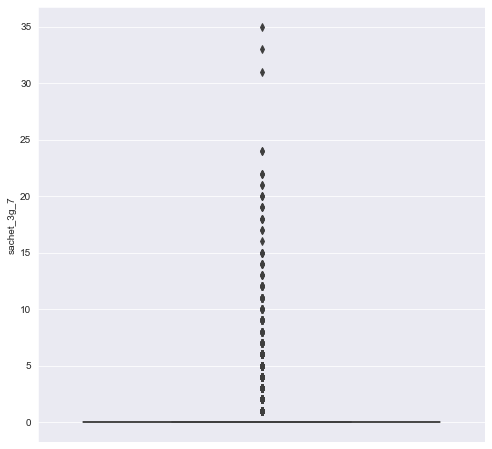

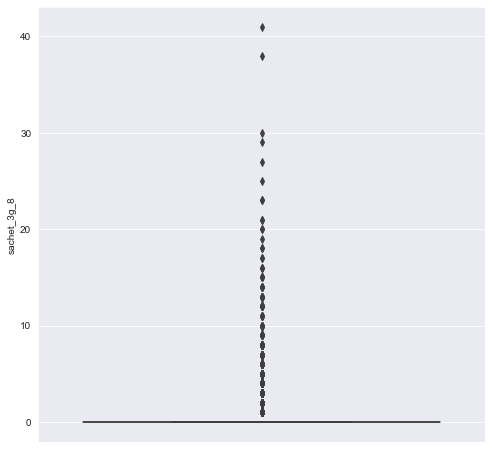

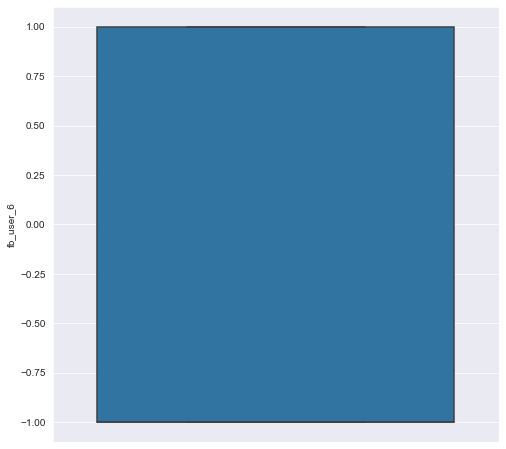

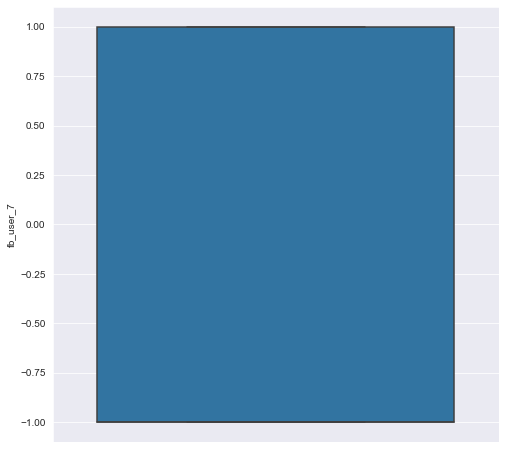

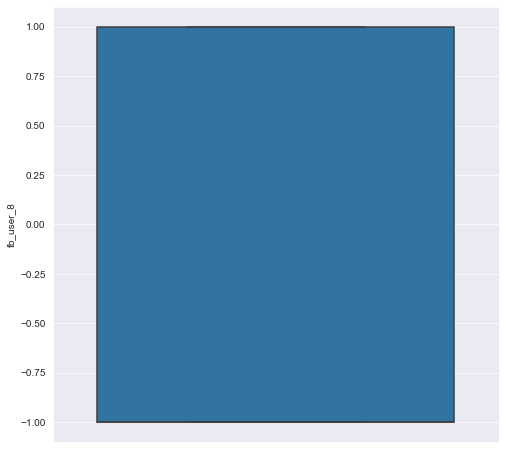

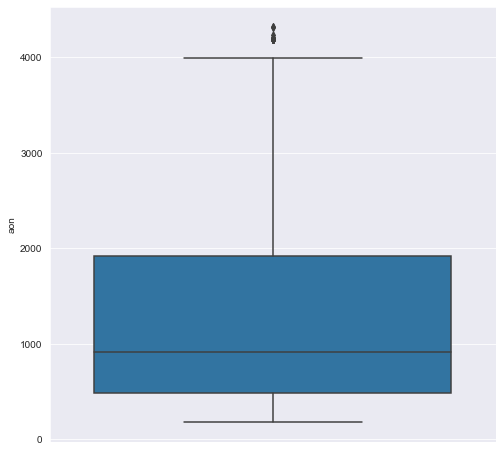

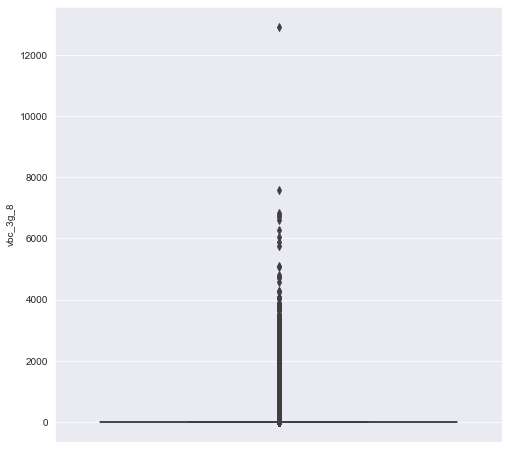

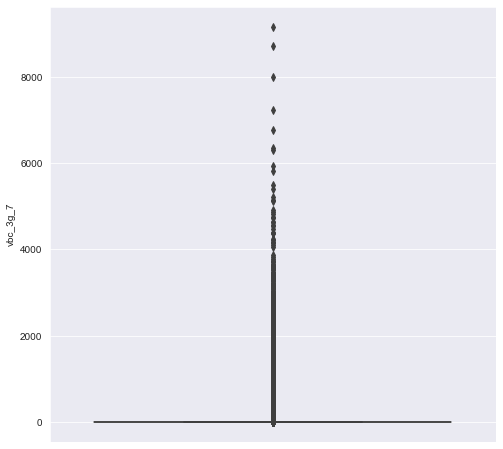

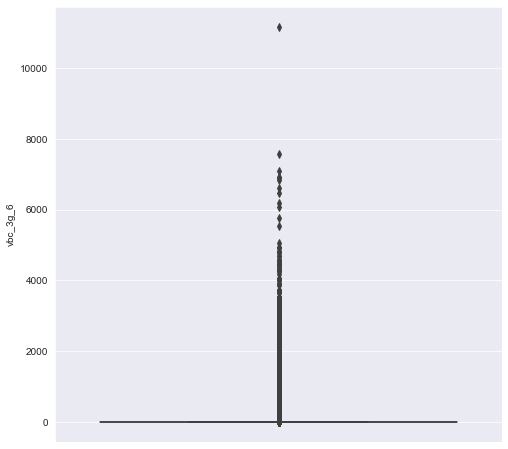

In [56]:
## Plotting boxplot to check outliers for each feature

cont_cols = [col for col in data_highvalue.columns if col not in ['churn']]
for col in cont_cols:
    plt.figure(figsize=(8, 8))
    sns.boxplot(y=col, data=data_highvalue)

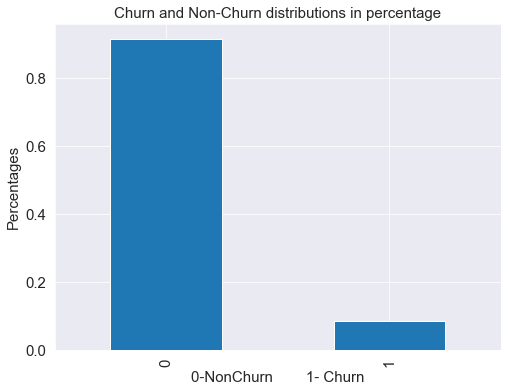

In [57]:
# plot to Check percetanges of churn and non churn data
plt.figure(figsize=(8,6))
data_highvalue["churn"].value_counts(normalize=True).plot.bar()
plt.tick_params(size=5,labelsize = 15) 
plt.title("Churn and Non-Churn distributions in percentage",fontsize=15)
plt.ylabel("Percentages",fontsize=15)
plt.xlabel("0-NonChurn        1- Churn",fontsize=15)
plt.grid(0.3)
plt.show()

- We have 92% customers belong non-churn and 8% customers belong to Churn type.

In [58]:
# check basic statistics
data_highvalue.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,296.034461,304.343206,267.600412,417.933372,423.924375,375.021691,17.412764,13.522114,13.25627,29.321648,22.036003,21.

In [59]:
#check columns associated with month 6, From month 6 we can figure out how the columns and data are in other months
cols = [col for col in data_highvalue.columns if "_6" in col]
cols

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'vbc_3g_6']

In [60]:
#Deriving new features : compare average revenue and calculate the difference
data_highvalue['arpu_diff'] = data_highvalue.arpu_8 - ((data_highvalue.arpu_6 + data_highvalue.arpu_7)/2)

# Check various columns related to Minutes of Usage and calculate difference
data_highvalue['onnet_mou_diff'] = data_highvalue.onnet_mou_8 - ((data_highvalue.onnet_mou_6 + data_highvalue.onnet_mou_7)/2)
data_highvalue['offnet_mou_diff'] = data_highvalue.offnet_mou_8 - ((data_highvalue.offnet_mou_6 + data_highvalue.offnet_mou_7)/2)
data_highvalue['roam_ic_mou_diff'] = data_highvalue.roam_ic_mou_8 - ((data_highvalue.roam_ic_mou_6 + data_highvalue.roam_ic_mou_7)/2)
data_highvalue['roam_og_mou_diff'] = data_highvalue.roam_og_mou_8 - ((data_highvalue.roam_og_mou_6 + data_highvalue.roam_og_mou_7)/2)
data_highvalue['loc_og_mou_diff'] = data_highvalue.loc_og_mou_8 - ((data_highvalue.loc_og_mou_6 + data_highvalue.loc_og_mou_7)/2)
data_highvalue['std_og_mou_diff'] = data_highvalue.std_og_mou_8 - ((data_highvalue.std_og_mou_6 + data_highvalue.std_og_mou_7)/2)
data_highvalue['isd_og_mou_diff'] = data_highvalue.isd_og_mou_8 - ((data_highvalue.isd_og_mou_6 + data_highvalue.isd_og_mou_7)/2)
data_highvalue['spl_og_mou_diff'] = data_highvalue.spl_og_mou_8 - ((data_highvalue.spl_og_mou_6 + data_highvalue.spl_og_mou_7)/2)
data_highvalue['total_og_mou_diff'] = data_highvalue.total_og_mou_8 - ((data_highvalue.total_og_mou_6 + data_highvalue.total_og_mou_7)/2)
data_highvalue['loc_ic_mou_diff'] = data_highvalue.loc_ic_mou_8 - ((data_highvalue.loc_ic_mou_6 + data_highvalue.loc_ic_mou_7)/2)
data_highvalue['std_ic_mou_diff'] = data_highvalue.std_ic_mou_8 - ((data_highvalue.std_ic_mou_6 + data_highvalue.std_ic_mou_7)/2)
data_highvalue['isd_ic_mou_diff'] = data_highvalue.isd_ic_mou_8 - ((data_highvalue.isd_ic_mou_6 + data_highvalue.isd_ic_mou_7)/2)
data_highvalue['spl_ic_mou_diff'] = data_highvalue.spl_ic_mou_8 - ((data_highvalue.spl_ic_mou_6 + data_highvalue.spl_ic_mou_7)/2)
data_highvalue['total_ic_mou_diff'] = data_highvalue.total_ic_mou_8 - ((data_highvalue.total_ic_mou_6 + data_highvalue.total_ic_mou_7)/2)

# Check total Recharge number
data_highvalue['total_rech_num_diff'] = data_highvalue.total_rech_num_8 - ((data_highvalue.total_rech_num_6 + data_highvalue.total_rech_num_7)/2)
#check total recharge amount
data_highvalue['total_rech_amt_diff'] = data_highvalue.total_rech_amt_8 - ((data_highvalue.total_rech_amt_6 + data_highvalue.total_rech_amt_7)/2)
#Check maximum recharge amount
data_highvalue['max_rech_amt_diff'] = data_highvalue.max_rech_amt_8 - ((data_highvalue.max_rech_amt_6 + data_highvalue.max_rech_amt_7)/2)
#check total recharge data
data_highvalue['total_rech_data_diff'] = data_highvalue.total_rech_data_8 - ((data_highvalue.total_rech_data_6 + data_highvalue.total_rech_data_7)/2)
#check maximum recharge data
data_highvalue['max_rech_data_diff'] = data_highvalue.max_rech_data_8 - ((data_highvalue.max_rech_data_6 + data_highvalue.max_rech_data_7)/2)
#Check average recharge amount in Data
data_highvalue['av_rech_amt_data_diff'] = data_highvalue.av_rech_amt_data_8 - ((data_highvalue.av_rech_amt_data_6 + data_highvalue.av_rech_amt_data_7)/2)
#check 2G data consumption difference in MB
data_highvalue['vol_2g_mb_diff'] = data_highvalue.vol_2g_mb_8 - ((data_highvalue.vol_2g_mb_6 + data_highvalue.vol_2g_mb_7)/2)
#Check 3G data consumption in MB
data_highvalue['vol_3g_mb_diff'] = data_highvalue.vol_3g_mb_8 - ((data_highvalue.vol_3g_mb_6 + data_highvalue.vol_3g_mb_7)/2)


In [61]:
data_highvalue.shape

(30011, 163)

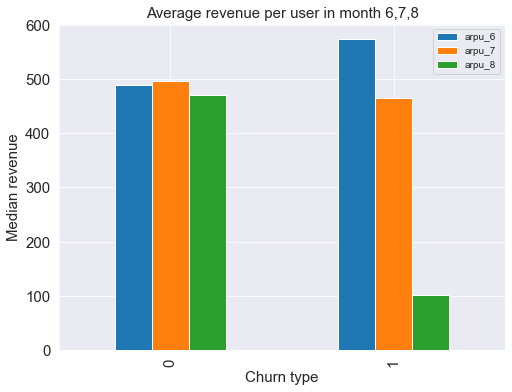

In [62]:
# Plot to visualize average revenue per user(ARPU)
data_highvalue.groupby("churn")["arpu_6","arpu_7","arpu_8"].median().plot.bar(figsize=[8,6])
plt.title("Average revenue per user in month 6,7,8",fontsize=15)
plt.tick_params(size=5,labelsize = 15) 
plt.ylabel("Median revenue",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- Average revenue per user - arpu_8 least in churners.

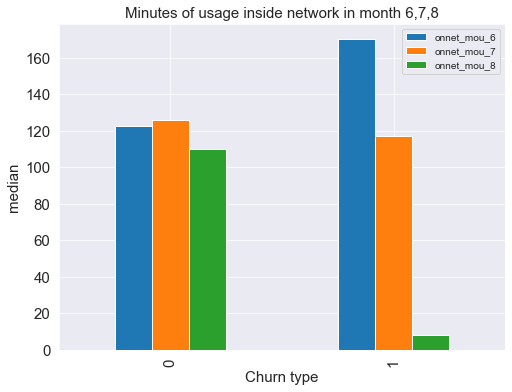

In [63]:
## Plot to visualize onnet_mou
data_highvalue.groupby("churn")["onnet_mou_6","onnet_mou_7","onnet_mou_8" ].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Minutes of usage inside network in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- Users whose minutes of usage are least in month 8, they are more likely to churn.

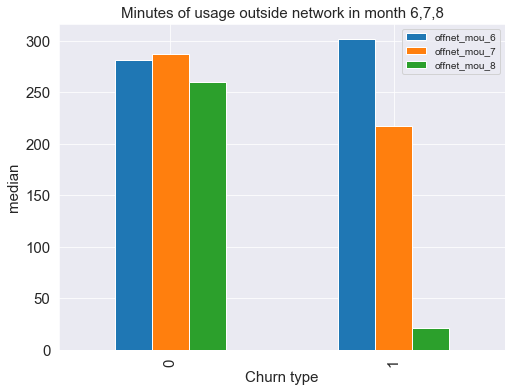

In [64]:
# Plot to visualize  offnet_mou
data_highvalue.groupby("churn")["offnet_mou_6","offnet_mou_7","offnet_mou_8" ].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Minutes of usage outside network in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- The users who have big difference of minutes of call duration to other network between month 8, are likely to churn.

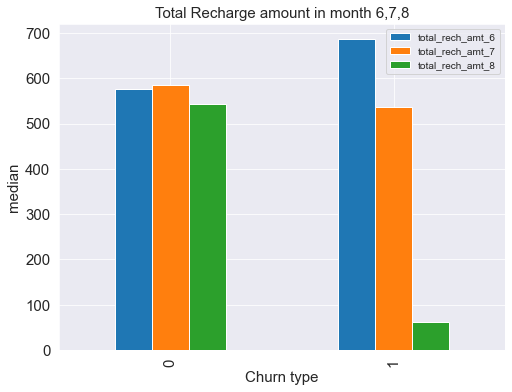

In [65]:
# Plot to visualize total_rech_amt
data_highvalue.groupby("churn")["total_rech_amt_6","total_rech_amt_7","total_rech_amt_8" ].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Total Recharge amount in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- When the difference of total recharge amount in months 6 and 7 and esp. in 8 is more, those users are more likely to churn.

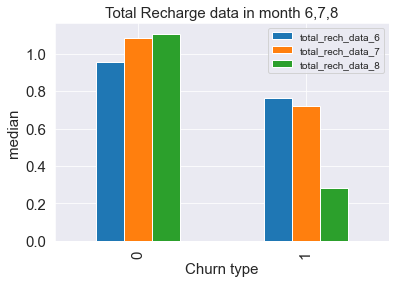

In [66]:
# Plot to visualize total_rech_data_
data_highvalue.groupby("churn")["total_rech_data_6","total_rech_data_7","total_rech_data_8" ].mean().plot.bar()
plt.tick_params(size=5,labelsize = 15) 
plt.title("Total Recharge data in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- When the difference of total data recharge amount in months 6 and 7 and esp. in month 8 is more, those users are more likely to churn

In [67]:
#Check the percenatges of churn in each category of Night Pack Users in month 8
pd.crosstab(data_highvalue.churn, data_highvalue.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,87.703347,97.037037,97.132616
1,12.296653,2.962963,2.867384


In [68]:
#Check the percenatges of churn in each category of Facebook Users in month 6
(pd.crosstab(data_highvalue.churn, data_highvalue.fb_user_8, normalize='columns')*100)

fb_user_8,-1.0,0.0,1.0
churn,,,
0,87.703347,93.828452,97.663077
1,12.296653,6.171548,2.336923


- Night pack users(which we do not know whether using or not) in month 8 , high churn rate: close to 14%
- Among Facebook users in month 8, close to 2% churns
- Customers who are not using facebook, close to 7% churns in month 8

- Average recharge amount in month 6,7,8 equal to 0 are more likely to churn

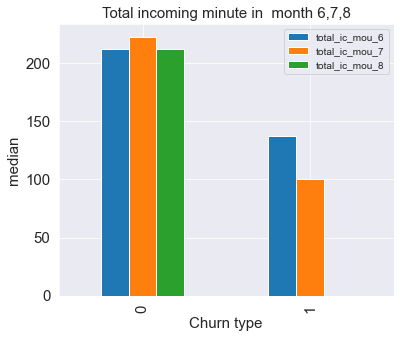

In [69]:
#Plot to visualize total_ic_mou
data_highvalue.groupby("churn")["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8"].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Total incoming minute in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- Users who do not have incoming minutes in month 8 and very less incoming in month 6 and 7 are more likely to churn.

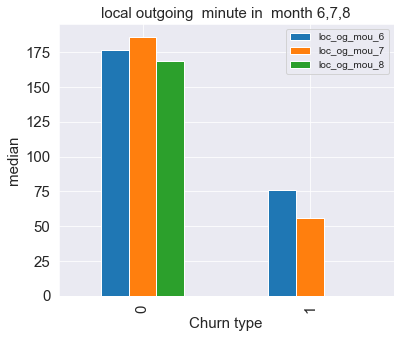

In [70]:
#plot to visualize loc_og_mou
data_highvalue.groupby("churn")["loc_og_mou_6","loc_og_mou_7","loc_og_mou_8"].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("local outgoing  minute in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- Users with less local outgoing minutes in months 6 and 7 and no outgoing in month 8 are more likely to churn

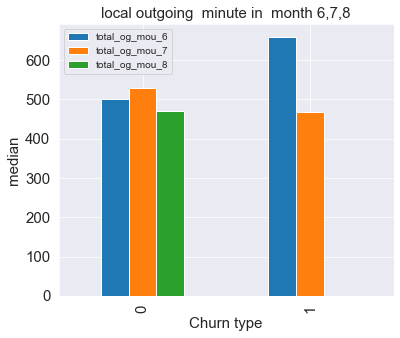

In [71]:
# total_og_mou_6
data_highvalue.groupby("churn")["total_og_mou_6","total_og_mou_7","total_og_mou_8"].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("local outgoing  minute in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- Total outgoing minute usage difference is more between month 6 and 7 and 0 mou in month 8, those users are more likely to churn

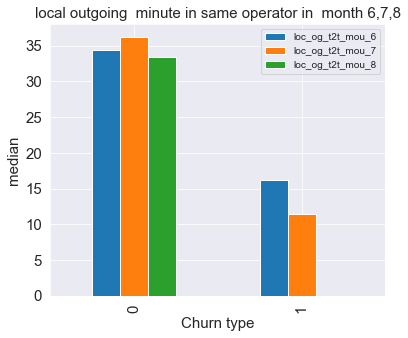

In [72]:
# loc_og_t2t_mou_6
data_highvalue.groupby("churn")["loc_og_t2t_mou_6","loc_og_t2t_mou_7","loc_og_t2t_mou_8"].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("local outgoing  minute in same operator in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- Local outgoing minute in same operator in month 6,7,8 are less, users are more likely to churn.

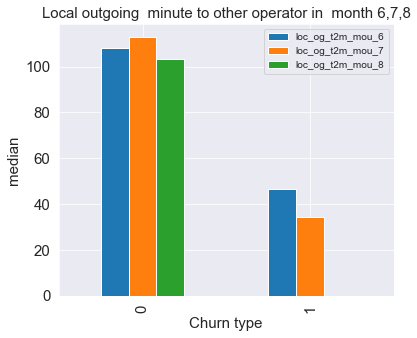

In [73]:
data_highvalue.groupby("churn")["loc_og_t2m_mou_6","loc_og_t2m_mou_7","loc_og_t2m_mou_8"].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Local outgoing  minute to other operator in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- Local outgoing minute to other operator is less, more likely to churn

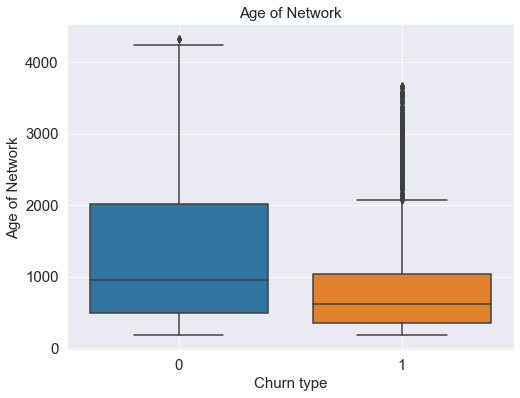

In [74]:
plt.figure(figsize=[8,6])
sns.boxplot(data=data_highvalue,x="churn",y="aon")
plt.tick_params(size=5,labelsize = 15) 
plt.title("Age of Network",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.ylabel("Age of Network",fontsize=15)
plt.grid(0.3)
plt.show()

- Median Age of network less,more likely to churn

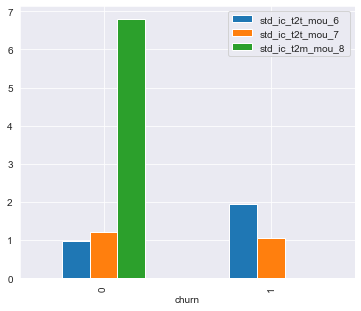

In [75]:
data_highvalue.groupby("churn")["std_ic_t2t_mou_6","std_ic_t2t_mou_7","std_ic_t2m_mou_8"].median().plot.bar(figsize=[6,5])
plt.show()

- Users who are using more STD calls are more likely to churn.

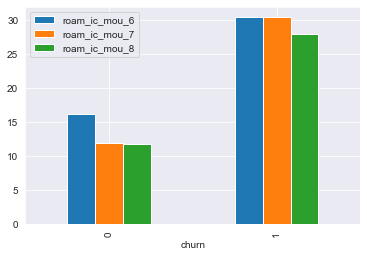

In [76]:
data_highvalue.groupby("churn")["roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8"].mean().plot.bar()
plt.show()

- Roaming in incoming minutes more, they are likely to churn more.

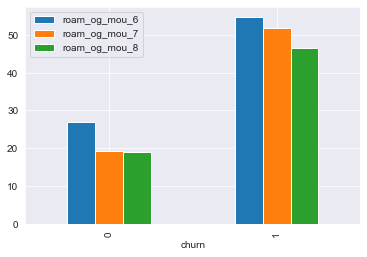

In [77]:
data_highvalue.groupby("churn")["roam_og_mou_6","roam_og_mou_7","roam_og_mou_8"].mean().plot.bar()
plt.show()

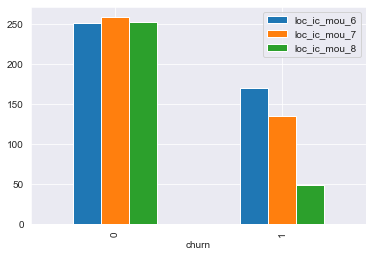

In [78]:
data_highvalue.groupby("churn")["loc_ic_mou_6","loc_ic_mou_7","loc_ic_mou_8"].mean().plot.bar()
plt.show()

- Customers whose incoming minutes are reducing in 6,7 and 8 months are more likely to churn

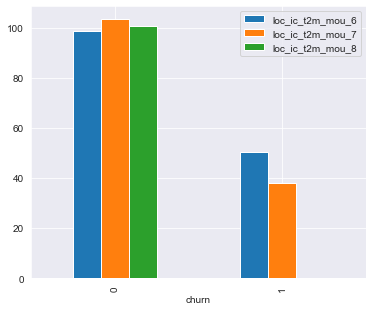

In [79]:
data_highvalue.groupby("churn")["loc_ic_t2m_mou_6","loc_ic_t2m_mou_7","loc_ic_t2m_mou_8"].median().plot.bar(figsize=[6,5])
plt.show()

- Customers whose local telecom to other operator mobile incoming minutes are reducing are more likely to churn

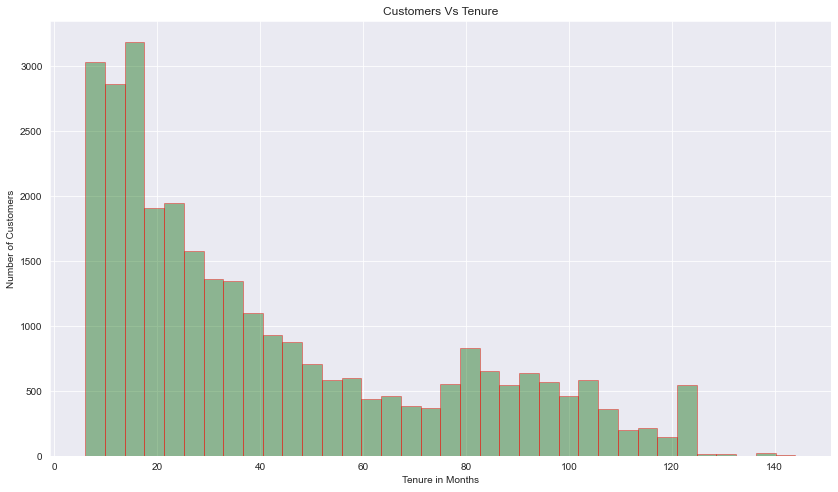

In [80]:
tenure_data = data_highvalue.copy()

plt.figure(figsize=(14,8))
# aon --> Age on network - number of days the customer is using the operator T network
tenure_data['tenure'] = data_highvalue['aon']/30
tenure_data['tenure'].head()
ax = sns.distplot(tenure_data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers Vs Tenure')
plt.show()

In [81]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)
tenure_data['tenure_range'].head()

7         2-5 Yrs
8     6-12 Months
13            NaN
16        1-2 Yrs
17        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

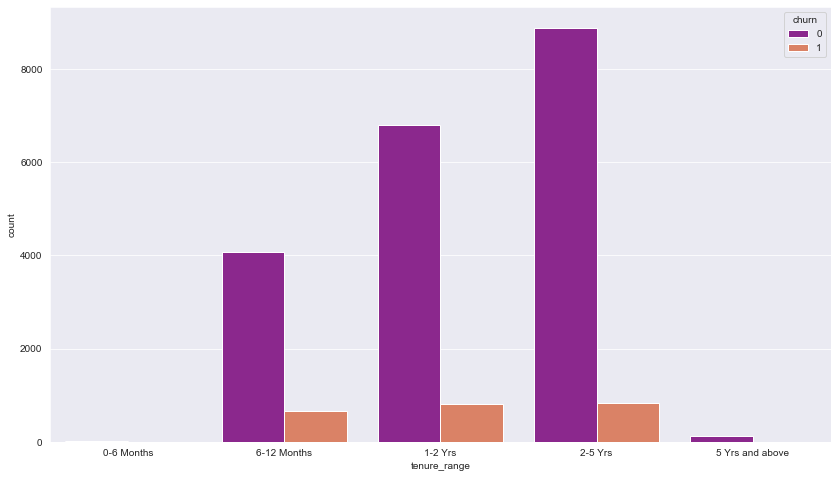

In [82]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data,palette=("plasma"))
plt.show()

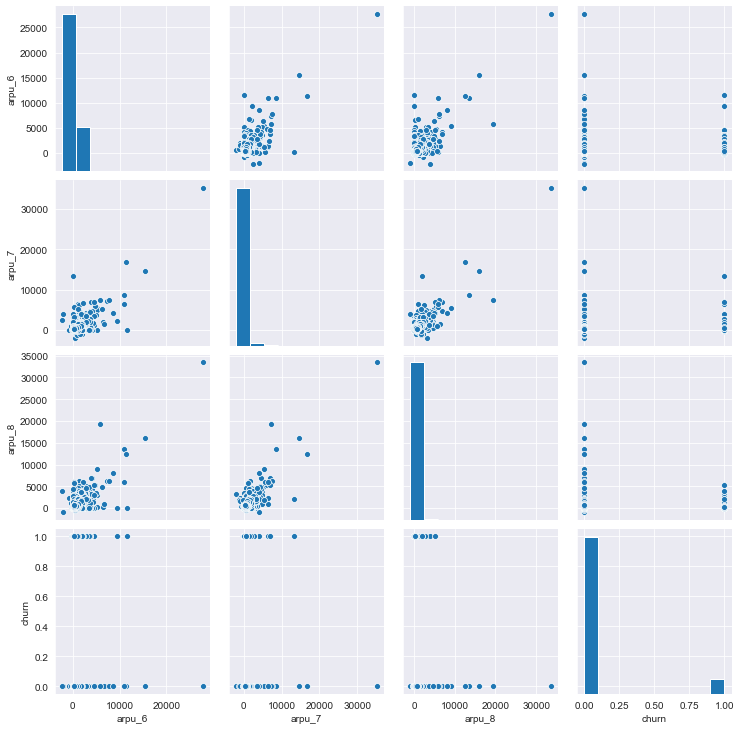

In [83]:
t1 = data_highvalue[['arpu_6','arpu_7', 'arpu_8', 'churn']]
sns.pairplot(t1)
plt.show()

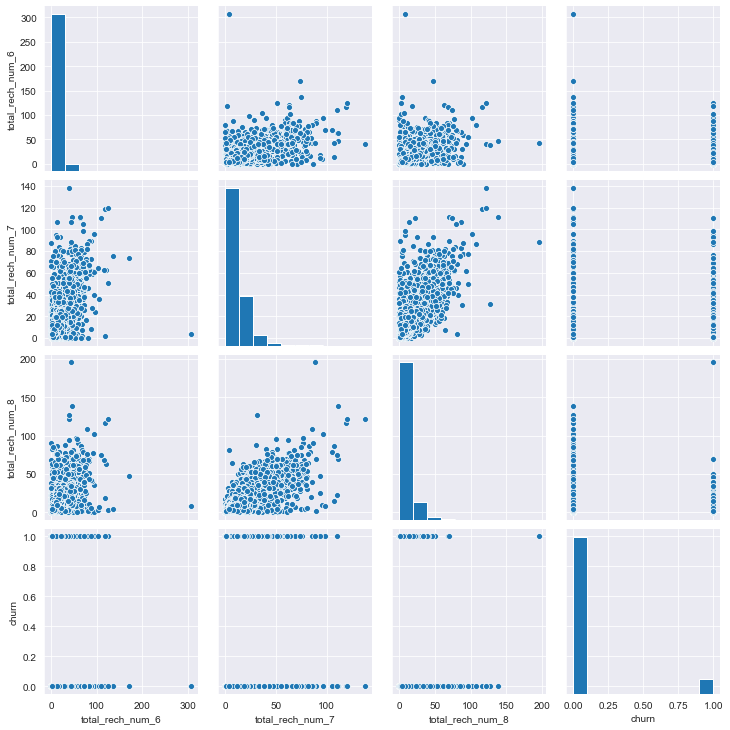

In [84]:
t1 = data_highvalue[['total_rech_num_6','total_rech_num_7', 'total_rech_num_8', 'churn']]
sns.pairplot(t1)
plt.show()

## 7. Model Building

In [85]:
#Load required library
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

### 7.1 Train Test Split of dataset

In [86]:
#Peform the train test split 
train,test = train_test_split(data_highvalue,test_size=0.3,random_state=56)

In [87]:
# check the training and testing data shape
print(f"train data shape:{train.shape}")
print(f"Test data shape:{test.shape}")

train data shape:(21007, 163)
Test data shape:(9004, 163)


In [88]:
#Convert categorical data to numeric columns by aggregation.
categorical_columns = ["night_pck_user_6","night_pck_user_7",
                       "night_pck_user_8","fb_user_6",          
                       "fb_user_8","fb_user_7"]

In [89]:
train[categorical_columns].head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_8,fb_user_7
31117,0.0,0.0,0.0,1.0,1.0,1.0
4571,0.0,0.0,0.0,1.0,1.0,1.0
36941,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
23115,0.0,0.0,-1.0,1.0,-1.0,1.0
50174,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [90]:
#Calculate categorical features mean and replace those with categorical value
print(train.groupby('night_pck_user_6')["churn"].mean())
print(train.groupby('night_pck_user_7')["churn"].mean())
print(train.groupby('night_pck_user_8')["churn"].mean())
print(train.groupby('fb_user_6')["churn"].mean())
print(train.groupby('fb_user_7')["churn"].mean())
print(train.groupby('fb_user_8')["churn"].mean())

night_pck_user_6
-1.0    0.101916
 0.0    0.064050
 1.0    0.075117
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.108633
 0.0    0.054559
 1.0    0.066351
Name: churn, dtype: float64
night_pck_user_8
-1.0    0.125566
 0.0    0.028757
 1.0    0.015385
Name: churn, dtype: float64
fb_user_6
-1.0    0.101916
 0.0    0.075282
 1.0    0.063128
Name: churn, dtype: float64
fb_user_7
-1.0    0.108633
 0.0    0.061043
 1.0    0.054099
Name: churn, dtype: float64
fb_user_8
-1.0    0.125566
 0.0    0.056689
 1.0    0.022999
Name: churn, dtype: float64


In [91]:
#Map each categorical value with mean value
mapping = {'night_pck_user_6' : {-1: 0.099621, 0: 0.066717, 1: 0.098462},
           'night_pck_user_7' : {-1: 0.116741, 0: 0.054784, 1: 0.058020},
           'night_pck_user_8' : {-1: 0.141980, 0: 0.028647, 1: 0.019084},
           'fb_user_6'        : {-1: 0.099621, 0: 0.083333, 1: 0.066233},
           'fb_user_7'        : {-1: 0.116741, 0: 0.065279, 1: 0.053977},
           'fb_user_8'        : {-1: 0.141980, 0: 0.067373, 1: 0.023955}}

#convert categorical to Numeric features by aggregation and replace in train data
train.replace(mapping, inplace = True)
#replace the same in test data
test.replace(mapping, inplace = True)

In [92]:
# segregate  X_train and y_train 
y_train = train.pop("churn")
X_train = train

In [93]:
# Segregate X_test and y_test
y_test = test.pop("churn")
X_test = test

In [94]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21007 entries, 31117 to 8266
Data columns (total 162 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   arpu_6                 float64
 1   arpu_7                 float64
 2   arpu_8                 float64
 3   onnet_mou_6            float64
 4   onnet_mou_7            float64
 5   onnet_mou_8            float64
 6   offnet_mou_6           float64
 7   offnet_mou_7           float64
 8   offnet_mou_8           float64
 9   roam_ic_mou_6          float64
 10  roam_ic_mou_7          float64
 11  roam_ic_mou_8          float64
 12  roam_og_mou_6          float64
 13  roam_og_mou_7          float64
 14  roam_og_mou_8          float64
 15  loc_og_t2t_mou_6       float64
 16  loc_og_t2t_mou_7       float64
 17  loc_og_t2t_mou_8       float64
 18  loc_og_t2m_mou_6       float64
 19  loc_og_t2m_mou_7       float64
 20  loc_og_t2m_mou_8       float64
 21  loc_og_t2f_mou_6       float64
 22  loc_og_t2f_mou_7  

In [95]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
31117,431.902,425.728,553.443,30.21,9.64,144.08,198.89,213.21,164.51,0.00,0.00,0.0,0.00,0.00,0.0,30.21,9.64,144.08,185.28,209.36,160.26,2.54,0.73,0.70,0.0,1.05,0.00,218.04,219.74,305.04,0.00,0.00,0.00,10.65,2.06,3.39,0.41,0.0,0.0,11.06,2.06,3.39,0.00,0.00,0.00,0.00,1.05,0.15,0.00,0.0,0.0,229.11,222.86,308.59,24.34,56.33,48.36,162.16,143.06,100.68,17.16,35.23,44.48,203.68,234.63,193.53,0.00,0.45,0.00,4.85,0.00,2.14,0.0,1.25,0.81,4.85,1.70,2.96,208.53,236.33,196.49,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,26,25,32,491,501,637,37,50,50,20,30,46,12.0,10.0,13.0,25.0,25.0,46.0,300.0,250.0,346.0,339.16,189.66,202.21,0.00,0.00,160.87,0.066717,0.054784,0.028647,0,0,0,12,10,13,0,0,0,0,0,0,0.066233,0.053977,0.023955,2238,36.36,0.00,0.00,124.6280,124.155,-41.54,0.00,0.000,86.150,-3.170,0.00,-0.375,82.605,-25.625,-0.315,0.000,0.00,-25.940,6.5,141.0,6.5,2.0,21.0,71.0,-62.200,160.870
4571,682.499,346.498,462.360,15.98,1.33,4.31,174.18,10.14,100.46,3.26,0.00,0.0,32.63,0.00,0.0,15.74,1.33,4.31,43.56,0.60,26.59,0.00,6.86,0.00,0.0,0.00,1.75,59.31,8.79,30.91,0.23,0.00,0.00,90.48,2.68,58.73,0.00,0.0,0.0,90.71,2.68,58.73,0.00,0.00,0.00,7.50,0.00,15.13,0.00,0.0,0.0,157.53,11.48,104.78,8.99,12.14,36.59,48.39,12.44,24.51,0.00,0.00,0.00,57.39,24.59,61.11,0.00,0.48,0.00,20.93,0.43,3.56,0.0,2.63,0.00,20.93,3.54,3.56,78.33,35.18,67.78,0.00,0.0,0.0,0.00,7.03,3.10,0.00,0.00,0.00,10,6,5,772,555,384,200,198,198,0,179,0,1.0,2.0,2.0,145.0,198.0,198.0,145.0,377.0,377.0,412.32,0.18,10.90,940.13,1586.56,3208.20,0.066717,0.054784,0.028647,0,1,1,0,0,0,1,1,1,0,0,0,0.066233,0.053977,0.023955,1080,1383.27,147.

In [96]:
# run random forest to get feature importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 25).fit(X_train, y_train)

feats = X_train.columns

for feature in zip(feats, rf.feature_importances_):
    print(feature)

('arpu_6', 0.007411608493946545)
('arpu_7', 0.00627430969757457)
('arpu_8', 0.038445277380274645)
('onnet_mou_6', 0.005903926607188589)
('onnet_mou_7', 0.006154882033338478)
('onnet_mou_8', 0.00734672172300198)
('offnet_mou_6', 0.006856077351002596)
('offnet_mou_7', 0.0057528436677349104)
('offnet_mou_8', 0.00980540147716121)
('roam_ic_mou_6', 0.002872574361044553)
('roam_ic_mou_7', 0.005612035610988818)
('roam_ic_mou_8', 0.009483812548757685)
('roam_og_mou_6', 0.0027596807913224625)
('roam_og_mou_7', 0.006407509651183556)
('roam_og_mou_8', 0.010114811316657028)
('loc_og_t2t_mou_6', 0.0059936571495978076)
('loc_og_t2t_mou_7', 0.005256917406940683)
('loc_og_t2t_mou_8', 0.012886667221522968)
('loc_og_t2m_mou_6', 0.00654693396663918)
('loc_og_t2m_mou_7', 0.005413902706308543)
('loc_og_t2m_mou_8', 0.04619639304460165)
('loc_og_t2f_mou_6', 0.0034304562839415904)
('loc_og_t2f_mou_7', 0.0028256375323285716)
('loc_og_t2f_mou_8', 0.0016513013090235587)
('loc_og_t2c_mou_6', 0.0024278989002822966

In [97]:
cols_for_model = ['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 
                 'loc_og_t2m_mou_8', 'loc_og_mou_8','std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
                 'loc_ic_mou_8','total_ic_mou_8', 'total_rech_amt_8', 'max_rech_amt_8','onnet_mou_diff', 'roam_ic_mou_diff', 
                 'roam_og_mou_diff', 'total_rech_num_diff', 'total_rech_amt_diff', 'churn']

In [98]:
data2 = data_highvalue
data_highvalue = data2[cols_for_model]
data_highvalue.shape

(30011, 22)

In [99]:
data_highvalue.columns # important attributes for model building

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'total_rech_amt_8', 'max_rech_amt_8', 'onnet_mou_diff', 'roam_ic_mou_diff', 'roam_og_mou_diff', 'total_rech_num_diff', 'total_rech_amt_diff', 'churn'], dtype='object')

### 7.2 Handling Class Imbalance

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [101]:
# Create Train and Test Sets
from sklearn.model_selection import train_test_split
y = data_highvalue.churn
X = data_highvalue.drop('churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=56)

In [102]:
print(y_train.value_counts())
y_train.value_counts(normalize = True).reset_index()

0    19192
1     1815
Name: churn, dtype: int64


,index,churn
0,0,0.9136
1,1,0.0864


In [103]:
print(y_test.value_counts())
y_test.value_counts(normalize = True).reset_index()

0    8226
1     778
Name: churn, dtype: int64


,index,churn
0,0,0.913594
1,1,0.086406


### 7.3 Logistic regression

In [104]:
# Base model
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression()

In [105]:
y_pred = lreg.predict(X_test)

In [106]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.9338071968014215
F1 score:  0.5578635014836795
Recall:  0.4832904884318766
Precision:  0.6596491228070176

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      8226
           1       0.66      0.48      0.56       778

    accuracy                           0.93      9004
   macro avg       0.81      0.73      0.76      9004
weighted avg       0.93      0.93      0.93      9004


 confussion matrix:
 [[8032  194]
 [ 402  376]]


We can handle imbalanced classes by balancing the classes by increasing minority or decreasing majority.

We can do that by following few techniques
1. Random Under-Sampling
2. Random Over-Sampling
3. SMOTE - Synthetic Minority Oversampling Technique
4. ADASYN - Adaptive Synthetic Sampling Method
5. SMOTETomek - Over-sampling followed by under-sampling

In [107]:
pip install imbalanced-learn

In [108]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

3630

In [109]:
from collections import Counter
print(sorted(Counter(y_resampled_us).items()))

[(0, 1815), (1, 1815)]


In [110]:
lreg_us = LogisticRegression()
lreg_us.fit(X_resampled_us, y_resampled_us)

y_pred_us = lreg_us.predict(X_test)

In [111]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_us))
print ('F1 score: ', f1_score(y_test, y_pred_us))
print ('Recall: ', recall_score(y_test, y_pred_us))
print ('Precision: ', precision_score(y_test, y_pred_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_us))

Accuracy:  0.8059751221679253
F1 score:  0.41940844134263877
Recall:  0.8110539845758354
Precision:  0.2828328103989243

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.88      8226
           1       0.28      0.81      0.42       778

    accuracy                           0.81      9004
   macro avg       0.63      0.81      0.65      9004
weighted avg       0.92      0.81      0.84      9004


 confussion matrix:
 [[6626 1600]
 [ 147  631]]


Tomek Links


1. Tomke link is a heuristic undersampling technique based on a distance measure. 
2. Tomek link is established based on a distance between instances from two different classes which are further used for removing majority class instance.

In [112]:
# Tomek Links
from imblearn.under_sampling import TomekLinks
tomek_sample = TomekLinks(sampling_strategy='majority')
X_resampled_tomek, y_resampled_tomek = tomek_sample.fit_resample(X_train, y_train)
len(X_resampled_tomek)

20591

In [113]:
print(sorted(Counter(y_resampled_tomek).items()))

[(0, 18776), (1, 1815)]


In [114]:
lreg_tomek = LogisticRegression()
lreg_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_tomek = lreg_tomek.predict(X_test)

In [115]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_tomek))
print ('Recall: ', recall_score(y_test, y_pred_tomek))
print ('Precision: ', precision_score(y_test, y_pred_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_tomek))

Accuracy:  0.9300310972900933
F1 score:  0.5544554455445544
Recall:  0.5038560411311054
Precision:  0.6163522012578616

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      8226
           1       0.62      0.50      0.55       778

    accuracy                           0.93      9004
   macro avg       0.79      0.74      0.76      9004
weighted avg       0.92      0.93      0.93      9004


 confussion matrix:
 [[7982  244]
 [ 386  392]]


Random Over-Sampling

1. Randomly add more minority observations by replication
2. No information loss
3. Prone to overfitting due to copying same information

In [116]:
# Random OverSampling
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

38384

In [117]:
print(sorted(Counter(y_resampled_os).items()))

[(0, 19192), (1, 19192)]


In [118]:
lreg_os = LogisticRegression()
lreg_os.fit(X_resampled_os, y_resampled_os)

y_pred_os = lreg_os.predict(X_test)

In [119]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_os))
print ('F1 score: ', f1_score(y_test, y_pred_os))
print ('Recall: ', recall_score(y_test, y_pred_os))
print ('Precision: ', precision_score(y_test, y_pred_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_os))

Accuracy:  0.811750333185251
F1 score:  0.4279446506918663
Recall:  0.8149100257069408
Precision:  0.29016018306636154

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      8226
           1       0.29      0.81      0.43       778

    accuracy                           0.81      9004
   macro avg       0.63      0.81      0.66      9004
weighted avg       0.92      0.81      0.85      9004


 confussion matrix:
 [[6675 1551]
 [ 144  634]]


SMOTE - Synthetic Minority Oversampling Technique
Creates new "Synthetic" observations

Process: - 
1. Identify the feature vector and its nearest neighbour
2. Take the difference between the two
3. Multiply the difference with a random number between 0 and 1
4. Identify a new point on the line segment by adding the random number to feature vector
5. Repeat the process for identified feature vectors

In [120]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

38384

In [121]:
print(sorted(Counter(y_resampled_smt).items()))

[(0, 19192), (1, 19192)]


In [122]:
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_smt = lreg_smt.predict(X_test)

In [123]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt))

Accuracy:  0.8125277654375833
F1 score:  0.42818428184281854
Recall:  0.8123393316195373
Precision:  0.2907083716651334

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      8226
           1       0.29      0.81      0.43       778

    accuracy                           0.81      9004
   macro avg       0.63      0.81      0.66      9004
weighted avg       0.92      0.81      0.85      9004


 confussion matrix:
 [[6684 1542]
 [ 146  632]]


ADASYN

1. In ADASYN, the minority examples are generated based on their density distribution.
2. More synthetic data are generated from minority class samples that are harder to learn as compared with those minority samples that are easier to learn.

In [124]:
# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

38457

In [125]:
print(sorted(Counter(y_resampled_ada).items()))

[(0, 19192), (1, 19265)]


In [126]:
lreg_ada = LogisticRegression()
lreg_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_ada = lreg_ada.predict(X_test)

In [127]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_ada))
print ('F1 score: ', f1_score(y_test, y_pred_ada))
print ('Recall: ', recall_score(y_test, y_pred_ada))
print ('Precision: ', precision_score(y_test, y_pred_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_ada))

Accuracy:  0.7535539760106619
F1 score:  0.3744009021708486
Recall:  0.8534704370179949
Precision:  0.23979776092452149

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.85      8226
           1       0.24      0.85      0.37       778

    accuracy                           0.75      9004
   macro avg       0.61      0.80      0.61      9004
weighted avg       0.92      0.75      0.81      9004


 confussion matrix:
 [[6121 2105]
 [ 114  664]]


Combining Oversampling and Undersampling

1. Tomek links can be used as an under-sampling method or as a data cleaning method.
2. Tomek links to the over-sampled training set as a data cleaning method. Thus, instead of removing only the majority class examples that from Tomek links, examples from both classes are removed.

In [128]:
# SMOTE+TOMEK
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=45)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train, y_train)
len(X_resampled_smt_tmk)

38236

In [129]:
print(sorted(Counter(y_resampled_smt_tmk).items()))

[(0, 19118), (1, 19118)]


In [130]:
lreg_smt_tmk = LogisticRegression()
lreg_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_smt_tmk = lreg_smt_tmk.predict(X_test)

In [131]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt_tmk))

Accuracy:  0.8120835184362506
F1 score:  0.42760487144790266
Recall:  0.8123393316195373
Precision:  0.29017447199265384

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      8226
           1       0.29      0.81      0.43       778

    accuracy                           0.81      9004
   macro avg       0.63      0.81      0.66      9004
weighted avg       0.92      0.81      0.85      9004


 confussion matrix:
 [[6680 1546]
 [ 146  632]]


### 7.4 Decision Trees

In [132]:
# Decision Trees - Base
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

In [133]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc))
print ('F1 score: ', f1_score(y_test, y_pred_dtc))
print ('Recall: ', recall_score(y_test, y_pred_dtc))
print ('Precision: ', precision_score(y_test, y_pred_dtc))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc))

Accuracy:  0.9035984007107952
F1 score:  0.4648581997533908
Recall:  0.4845758354755784
Precision:  0.4466824644549763

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      8226
           1       0.45      0.48      0.46       778

    accuracy                           0.90      9004
   macro avg       0.70      0.71      0.71      9004
weighted avg       0.91      0.90      0.91      9004


 confussion matrix:
 [[7759  467]
 [ 401  377]]


In [134]:
# Decision Trees - Random UnderSampling
from sklearn.tree import DecisionTreeClassifier
dtc_us = DecisionTreeClassifier(random_state=0)
dtc_us.fit(X_resampled_us, y_resampled_us)

y_pred_dtc_us = dtc_us.predict(X_test)

In [135]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_us))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_us))
print ('Recall: ', recall_score(y_test, y_pred_dtc_us))
print ('Precision: ', precision_score(y_test, y_pred_dtc_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_us))

Accuracy:  0.7848733896046202
F1 score:  0.3805564438759194
Recall:  0.7647814910025706
Precision:  0.25329927628778204

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87      8226
           1       0.25      0.76      0.38       778

    accuracy                           0.78      9004
   macro avg       0.61      0.78      0.63      9004
weighted avg       0.91      0.78      0.83      9004


 confussion matrix:
 [[6472 1754]
 [ 183  595]]


In [136]:
# Decision Trees - Tomek Links
from sklearn.tree import DecisionTreeClassifier
dtc_tomek = DecisionTreeClassifier(random_state=0)
dtc_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_dtc_tomek = dtc_tomek.predict(X_test)

In [137]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_tomek))
print ('Recall: ', recall_score(y_test, y_pred_dtc_tomek))
print ('Precision: ', precision_score(y_test, y_pred_dtc_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_tomek))


Accuracy:  0.9049311417147934
F1 score:  0.48557692307692313
Recall:  0.519280205655527
Precision:  0.45598194130925507

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      8226
           1       0.46      0.52      0.49       778

    accuracy                           0.90      9004
   macro avg       0.70      0.73      0.72      9004
weighted avg       0.91      0.90      0.91      9004


 confussion matrix:
 [[7744  482]
 [ 374  404]]


In [138]:
# Decision Trees - Random Over-Sampling
from sklearn.tree import DecisionTreeClassifier
dtc_os = DecisionTreeClassifier(random_state=0)
dtc_os.fit(X_resampled_os, y_resampled_os)

y_pred_dtc_os = dtc_os.predict(X_test)

In [139]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_os))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_os))
print ('Recall: ', recall_score(y_test, y_pred_dtc_os))
print ('Precision: ', precision_score(y_test, y_pred_dtc_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_os))

Accuracy:  0.9083740559751222
F1 score:  0.46877012234385057
Recall:  0.46786632390745503
Precision:  0.4696774193548387

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      8226
           1       0.47      0.47      0.47       778

    accuracy                           0.91      9004
   macro avg       0.71      0.71      0.71      9004
weighted avg       0.91      0.91      0.91      9004


 confussion matrix:
 [[7815  411]
 [ 414  364]]


In [140]:
# Decision Trees - SMOTE
from sklearn.tree import DecisionTreeClassifier
dtc_smt = DecisionTreeClassifier(random_state=0)
dtc_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_dtc_smt = dtc_smt.predict(X_test)

In [141]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt))

Accuracy:  0.8740559751221679
F1 score:  0.45164410058027077
Recall:  0.6002570694087404
Precision:  0.362015503875969

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      8226
           1       0.36      0.60      0.45       778

    accuracy                           0.87      9004
   macro avg       0.66      0.75      0.69      9004
weighted avg       0.91      0.87      0.89      9004


 confussion matrix:
 [[7403  823]
 [ 311  467]]


In [142]:
# Decision Trees - ADASYN
from sklearn.tree import DecisionTreeClassifier
dtc_ada = DecisionTreeClassifier(random_state=0)
dtc_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_dtc_ada = dtc_ada.predict(X_test)

In [143]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_ada))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_ada))
print ('Recall: ', recall_score(y_test, y_pred_dtc_ada))
print ('Precision: ', precision_score(y_test, y_pred_dtc_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_ada))

Accuracy:  0.8623944913371835
F1 score:  0.43450479233226835
Recall:  0.6118251928020566
Precision:  0.33687190375088466

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92      8226
           1       0.34      0.61      0.43       778

    accuracy                           0.86      9004
   macro avg       0.65      0.75      0.68      9004
weighted avg       0.91      0.86      0.88      9004


 confussion matrix:
 [[7289  937]
 [ 302  476]]


In [144]:
# Decision Trees - SMOTE+TOMEK
from sklearn.tree import DecisionTreeClassifier
dtc_smt_tmk = DecisionTreeClassifier(random_state=0)
dtc_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_dtc_smt_tmk = dtc_smt_tmk.predict(X_test)

In [145]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt_tmk))

Accuracy:  0.8762772101288316
F1 score:  0.4644230769230769
Recall:  0.6208226221079691
Precision:  0.3709677419354839

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      8226
           1       0.37      0.62      0.46       778

    accuracy                           0.88      9004
   macro avg       0.67      0.76      0.70      9004
weighted avg       0.91      0.88      0.89      9004


 confussion matrix:
 [[7407  819]
 [ 295  483]]


### 7.5 Random Forest

In [146]:
# Random Forest - Base
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [147]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.9375832963127498
F1 score:  0.5643410852713179
Recall:  0.46786632390745503
Precision:  0.7109375

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      8226
           1       0.71      0.47      0.56       778

    accuracy                           0.94      9004
   macro avg       0.83      0.72      0.77      9004
weighted avg       0.93      0.94      0.93      9004


 confussion matrix:
 [[8078  148]
 [ 414  364]]


In [148]:
# Random Forest - Random UnderSampling
rf_us = RandomForestClassifier()
rf_us.fit(X_resampled_us, y_resampled_us)

y_pred_rf_us = rf_us.predict(X_test)

In [149]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_us))
print ('F1 score: ', f1_score(y_test, y_pred_rf_us))
print ('Recall: ', recall_score(y_test, y_pred_rf_us))
print ('Precision: ', precision_score(y_test, y_pred_rf_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_us))

Accuracy:  0.8641714793425145
F1 score:  0.5046577561765897
Recall:  0.800771208226221
Precision:  0.3684210526315789

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      8226
           1       0.37      0.80      0.50       778

    accuracy                           0.86      9004
   macro avg       0.67      0.84      0.71      9004
weighted avg       0.93      0.86      0.89      9004


 confussion matrix:
 [[7158 1068]
 [ 155  623]]


In [150]:
# Random Forest - Tomek Links
rf_tomek = RandomForestClassifier()
rf_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_rf_tomek = rf_tomek.predict(X_test)

In [151]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_rf_tomek))
print ('Recall: ', recall_score(y_test, y_pred_rf_tomek))
print ('Precision: ', precision_score(y_test, y_pred_rf_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_tomek))

Accuracy:  0.938249666814749
F1 score:  0.5893648449039881
Recall:  0.512853470437018
Precision:  0.6927083333333334

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      8226
           1       0.69      0.51      0.59       778

    accuracy                           0.94      9004
   macro avg       0.82      0.75      0.78      9004
weighted avg       0.93      0.94      0.93      9004


 confussion matrix:
 [[8049  177]
 [ 379  399]]


In [152]:
# Random Forest - Random Over-Sampling
rf_os = RandomForestClassifier()
rf_os.fit(X_resampled_os, y_resampled_os)

y_pred_rf_os = rf_os.predict(X_test)

In [153]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_os))
print ('F1 score: ', f1_score(y_test, y_pred_rf_os))
print ('Recall: ', recall_score(y_test, y_pred_rf_os))
print ('Precision: ', precision_score(y_test, y_pred_rf_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_os))

Accuracy:  0.9361394935584185
F1 score:  0.5895788722341184
Recall:  0.5308483290488432
Precision:  0.6629213483146067

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      8226
           1       0.66      0.53      0.59       778

    accuracy                           0.94      9004
   macro avg       0.81      0.75      0.78      9004
weighted avg       0.93      0.94      0.93      9004


 confussion matrix:
 [[8016  210]
 [ 365  413]]


In [154]:
# Random Forest - SMOTE
rf_smt = RandomForestClassifier()
rf_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_rf_smt = rf_smt.predict(X_test)

In [155]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt))

Accuracy:  0.9132607729897824
F1 score:  0.5739225313693399
Recall:  0.6760925449871465
Precision:  0.4985781990521327

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      8226
           1       0.50      0.68      0.57       778

    accuracy                           0.91      9004
   macro avg       0.73      0.81      0.76      9004
weighted avg       0.93      0.91      0.92      9004


 confussion matrix:
 [[7697  529]
 [ 252  526]]


In [156]:
# Random Forest - ADASYN
rf_ada = RandomForestClassifier()
rf_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_rf_ada = rf_ada.predict(X_test)

In [157]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_ada))
print ('F1 score: ', f1_score(y_test, y_pred_rf_ada))
print ('Recall: ', recall_score(y_test, y_pred_rf_ada))
print ('Precision: ', precision_score(y_test, y_pred_rf_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_ada))

Accuracy:  0.9061528209684585
F1 score:  0.5573598742797276
Recall:  0.6838046272493573
Precision:  0.47038019451812557

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      8226
           1       0.47      0.68      0.56       778

    accuracy                           0.91      9004
   macro avg       0.72      0.81      0.75      9004
weighted avg       0.93      0.91      0.91      9004


 confussion matrix:
 [[7627  599]
 [ 246  532]]


In [158]:
# Random Forest - SMOTE+TOMEK
rf_smt_tmk = RandomForestClassifier()
rf_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_rf_smt_tmk = rf_smt_tmk.predict(X_test)

In [159]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt_tmk))

Accuracy:  0.9145935139937805
F1 score:  0.577240241891149
Recall:  0.6748071979434447
Precision:  0.5043227665706052

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      8226
           1       0.50      0.67      0.58       778

    accuracy                           0.91      9004
   macro avg       0.74      0.81      0.76      9004
weighted avg       0.93      0.91      0.92      9004


 confussion matrix:
 [[7710  516]
 [ 253  525]]


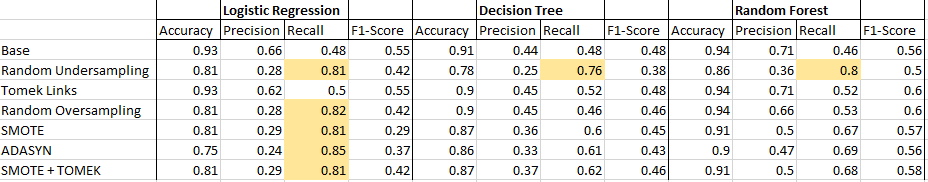

As we can see above on the summary table, we have recall value high for Random Forest with random undersampling, Logistic Regression with Random US, Random OS, SMOTE, ADASYN, SMOTE+TOMEK. Within logistic regression ADASYN has highest recall.

We will pick up random forest with undersampling method and logistic Regression ADASYN as best performing models. We will further analyse which model is the best.

# 8. Model building - hyperparameters tuning


### 8.1 Evaluating Logistic Regression ADASYN model

In [160]:
X_resampled_ada.shape, y_resampled_ada.shape

((38457, 21), (38457,))

In [161]:
X_resampled_ada.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,std_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,total_ic_mou_8,total_rech_amt_8,max_rech_amt_8,onnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,total_rech_num_diff,total_rech_amt_diff
0,336.112,37.06,326.66,0.0,0.0,37.06,325.13,362.44,0.00,364.29,227.01,367.19,626.84,627.33,399,44,-51.835,0.000,0.00,-4.0,-170.0
1,311.519,88.91,222.83,0.0,0.0,61.86,181.11,243.84,67.68,312.69,74.31,150.04,226.04,280.88,310,130,-189.490,0.000,0.00,-7.0,-808.5
2,340.900,44.48,271.24,0.0,0.0,17.69,188.71,221.44,94.28,315.73,33.79,133.38,205.03,206.56,400,50,-63.435,0.000,0.00,2.5,-135.0
3,157.770,21.39,51.79,0.0,0.0,17.43,30.58,55.41,12.13,73.19,138.01,118.13,314.44,317.46,41,41,-26.750,-43.665,-58.47,-0.5,-366.5
4,0.000,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,16.11,3.14,19.71,23.66,0,0,-14.160,0.000,0.00,-7.5,-449.0


### Recursive Feature Elimination - RFE

In [162]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

In [163]:
rfe = RFE(estimator=lreg_ada, n_features_to_select=10) # Selecting 10 features that are important

In [164]:
rfe.fit(X_resampled_ada, y_resampled_ada)

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [165]:
rfe.ranking_

array([ 8,  1,  1,  3,  1,  5,  1,  1, 11,  1,  2, 12,  1,  1,  9,  7, 10,
        4,  6,  1,  1])

In [166]:
X_resampled_ada.columns[rfe.support_]

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_diff', 'total_rech_amt_diff'], dtype='object')

In [167]:
X_resampled_ada2 = X_resampled_ada.loc[:,rfe.support_]
X_resampled_ada2.shape

(38457, 10)

In [168]:
# Top 10 important features
X_resampled_ada2.columns

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_diff', 'total_rech_amt_diff'], dtype='object')

In [169]:
from sklearn.model_selection import cross_val_score
cross_val_score(lreg_ada, X_resampled_ada2, y_resampled_ada, n_jobs=-1)

array([0.77431097, 0.74219969, 0.76218957, 0.77324145, 0.74281628])

## Cross validation for feature selection

In [170]:
num_features = X_resampled_ada.shape
num_features[1]

21

In [171]:
rfecv = RFECV(estimator=lreg_ada, cv=4)

In [172]:
%%time
rfecv.fit(X_resampled_ada, y_resampled_ada)

Wall time: 37 s


RFECV(cv=4, estimator=LogisticRegression())

In [173]:
rfecv.grid_scores_

array([0.65397708, 0.72733193, 0.74269969, 0.74771808, 0.74659992,
       0.74784814, 0.74803016, 0.74909631, 0.74888834, 0.75499902,
       0.7558832 , 0.75983558, 0.7585094 , 0.75757324, 0.75780728,
       0.75793732, 0.75962755, 0.7605116 , 0.7606416 , 0.7607196 ,
       0.76040758])

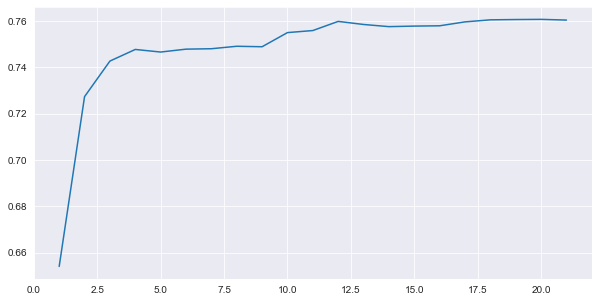

In [174]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, num_features[1]+1), rfecv.grid_scores_)
plt.show()

In [175]:
rfecv.n_features_

20

In [176]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

### 8.2 Hyper-parameter tuning using Cross Validation for Random Forest Undersampling model

In [177]:
from sklearn.model_selection import GridSearchCV

In [178]:
hyper_params = {'max_depth': [3, 5, 10, 15, 20],
                'max_features': [3, 5, 7, 11, 15],
                'min_samples_leaf': [20, 50, 100, 200, 400],
                'n_estimators': [10, 25, 50, 80, 100]
               }

In [179]:
# Performing Gridsearch for Random Forest Undersampling model
model_cv = GridSearchCV(estimator=rf_us, 
             param_grid=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1,
             return_train_score=True)

In [180]:
model_cv.fit(X_resampled_us, y_resampled_us)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [3, 5, 7, 11, 15],
                         'min_samples_leaf': [20, 50, 100, 200, 400],
                         'n_estimators': [10, 25, 50, 80, 100]},
             return_train_score=True, verbose=1)

In [181]:
model_cv.best_score_

0.8493112947658403

In [182]:
model_cv.best_estimator_     # Displaying best values for hyperparameters

RandomForestClassifier(max_depth=15, max_features=11, min_samples_leaf=20,
                       n_estimators=80)

### RandomizedSearchCV

In [183]:
from sklearn.model_selection import RandomizedSearchCV

In [184]:
hyper_params = {'max_depth': range(3, 20),
                'max_features': range(3, 17),
                'min_samples_leaf': range(20, 400, 50),
                'n_estimators': range(10, 101, 10)}

In [185]:
# Performing Randomizedsearch for Random Forest Undersampling model
model_rcv = RandomizedSearchCV(estimator=rf_us, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=50)

In [186]:
model_rcv.fit(X_resampled_us, y_resampled_us)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': range(3, 17),
                                        'min_samples_leaf': range(20, 400, 50),
                                        'n_estimators': range(10, 101, 10)},
                   return_train_score=True, verbose=1)

In [187]:
model_rcv.best_score_

0.8471074380165289

In [188]:
model_rcv.best_estimator_ # Displaying best values for hyperparameters

RandomForestClassifier(max_depth=19, max_features=6, min_samples_leaf=20,
                       n_estimators=30)

## Conclusion : Comparing the scores obtained and complexity of the above models, we conclude that model_rcv is best model 

# 9. Best Model

In [189]:
rf_best = model_rcv.best_estimator_ # Naming the best model rf_best

In [190]:
rf_best # Displaying the hyperparametres

RandomForestClassifier(max_depth=19, max_features=6, min_samples_leaf=20,
                       n_estimators=30)

In [191]:
y_pred_rcv = rf_best.predict(X_test) # Predicting the churn variable for test data

In [192]:
# Evaluation Metrics - We see that we get good accuracy and Recall values
print ('Accuracy: ', accuracy_score(y_test, y_pred_rcv))
print ('F1 score: ', f1_score(y_test, y_pred_rcv))
print ('Recall: ', recall_score(y_test, y_pred_rcv))
print ('Precision: ', precision_score(y_test, y_pred_rcv))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rcv))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rcv))

Accuracy:  0.8540648600621946
F1 score:  0.4887159533073929
Recall:  0.8071979434447301
Precision:  0.35044642857142855

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.91      8226
           1       0.35      0.81      0.49       778

    accuracy                           0.85      9004
   macro avg       0.66      0.83      0.70      9004
weighted avg       0.92      0.85      0.88      9004


 confussion matrix:
 [[7062 1164]
 [ 150  628]]


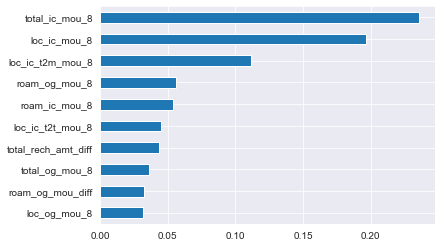

In [193]:
# Accuracy Score for Final Model : 0.86
# Recall for Final Model is 0.81
# list of important features

importances = rf_best.feature_importances_
weights = pd.Series(importances,
                 index=X_resampled_ada.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

### Based upon the important features identified, following are the recommendations to the company.<br>
### Recommendations : <br>
1. We see that total_ic_mou_8 is the top feature for churners. The company can reduce the charges/ provide discounts for std/roaming incoming calls.<br>
2. The company can provide competitive discounts on roaming/std outgoing calls.<br>
3. In case the company observes difference in monthly average recharge amount of the customer, it may recommend discounted top ups/ recharge plans to such customers so that they do not churn.<br>
4. The company can come up with campaigns/offers where local/std/roaming incoming calls are absolutely free for some period for the customers in action phase.

# Our Analysis is complete. Thank You.